In [232]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e26/sample_submission.csv
/kaggle/input/playground-series-s3e26/train.csv
/kaggle/input/playground-series-s3e26/test.csv


In [233]:
df = pd.read_csv("/kaggle/input/playground-series-s3e26/train.csv")


In [234]:
df2 = pd.read_csv("/kaggle/input/playground-series-s3e26/test.csv")

In [235]:
df

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0        0     999  D-penicillamine  21532   M       N            N       N   
1        1    2574          Placebo  19237   F       N            N       N   
2        2    3428          Placebo  13727   F       N            Y       Y   
3        3    2576          Placebo  18460   F       N            N       N   
4        4     788          Placebo  16658   F       N            Y       N   
...    ...     ...              ...    ...  ..     ...          ...     ...   
7900  7900    1166  D-penicillamine  16839   F       N            N       N   
7901  7901    1492          Placebo  17031   F       N            Y       N   
7902  7902    1576  D-penicillamine  25873   F       N            N       Y   
7903  7903    3584  D-penicillamine  22960   M       N            Y       N   
7904  7904    1978  D-penicillamine  19237   F       N            N       N   

     Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0        N        2.3        316.0     3.35   172.0    1601.0  179.80   
1        N        0.9        364.0     3.54    63.0    1440.0  134.85   
2        Y        3.3        299.0     3.55   131.0    1029.0  119.35   
3        N        0.6        256.0     3.50    58.0    1653.0   71.30   
4        N        1.1        346.0     3.65    63.0    1181.0  125.55   
...    ...        ...          ...      ...     ...       ...     ...   
7900     N        0.8        309.0     3.56    38.0    1629.0   79.05   
7901     N        0.9        260.0     3.43    62.0    1440.0  142.00   
7902     S        2.0        225.0     3.19    51.0     933.0   69.75   
7903     N        0.7        248.0     2.75    32.0    1003.0   57.35   
7904     N        0.7        256.0     3.23    22.0     645.0   74.40   

      Tryglicerides  Platelets  Prothrombin  Stage Status  
0              63.0      394.0          9.7    3.0      D  
1              88.0      361.0         11.0    3.0      C  
2              50.0      199.0         11.7    4.0      D  
3              96.0      269.0         10.7    3.0      C  
4              96.0      298.0         10.6    4.0      C  
...             ...        ...          ...    ...    ...  
7900          224.0      344.0          9.9    2.0      C  
7901           78.0      277.0         10.0    4.0      C  
7902           62.0      200.0         12.7    2.0      D  
7903          118.0      221.0         10.6    4.0      D  
7904           85.0      336.0         10.3    3.0      C  

[7905 rows x 20 columns]

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [237]:
df.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [238]:
df.duplicated().sum()

0

# No Null or DUPLICATED Values 

In [239]:
df.nunique()

id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

In [240]:
df.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status'],
      dtype='object')

In [241]:
category = df[['Drug', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema','Stage', 'Status']]

In [242]:
category

Drug Sex Ascites Hepatomegaly Spiders Edema  Stage Status
0     D-penicillamine   M       N            N       N     N    3.0      D
1             Placebo   F       N            N       N     N    3.0      C
2             Placebo   F       N            Y       Y     Y    4.0      D
3             Placebo   F       N            N       N     N    3.0      C
4             Placebo   F       N            Y       N     N    4.0      C
...               ...  ..     ...          ...     ...   ...    ...    ...
7900  D-penicillamine   F       N            N       N     N    2.0      C
7901          Placebo   F       N            Y       N     N    4.0      C
7902  D-penicillamine   F       N            N       Y     S    2.0      D
7903  D-penicillamine   M       N            Y       N     N    4.0      D
7904  D-penicillamine   F       N            N       N     N    3.0      C

[7905 rows x 8 columns]

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt

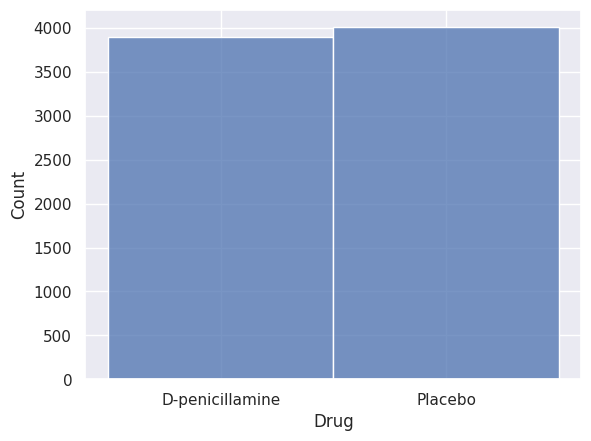

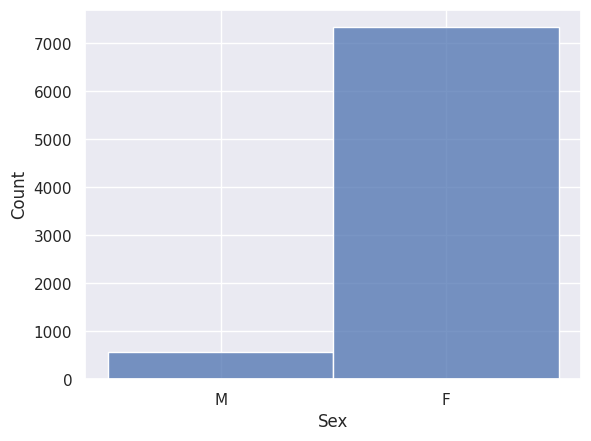

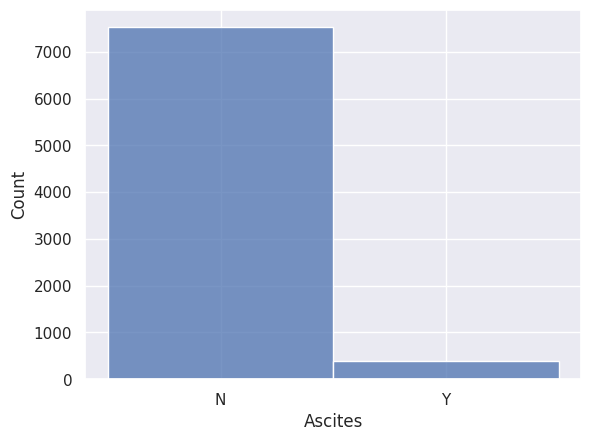

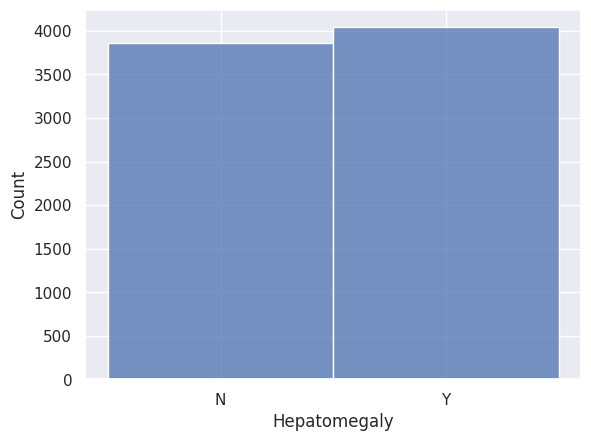

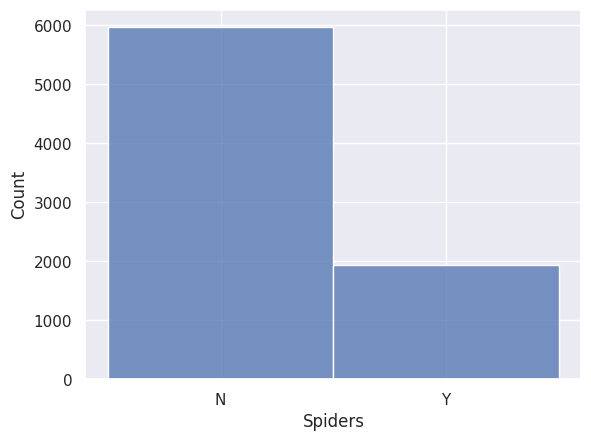

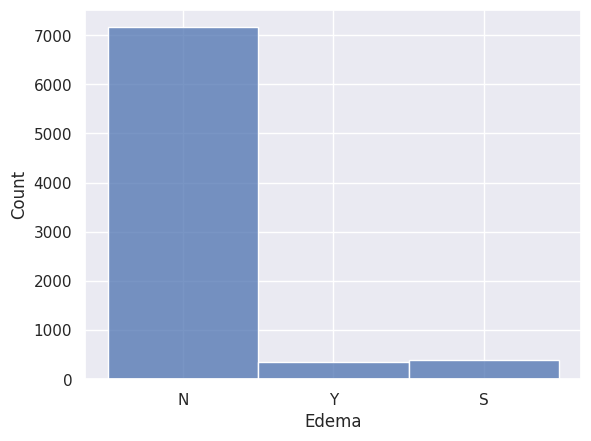

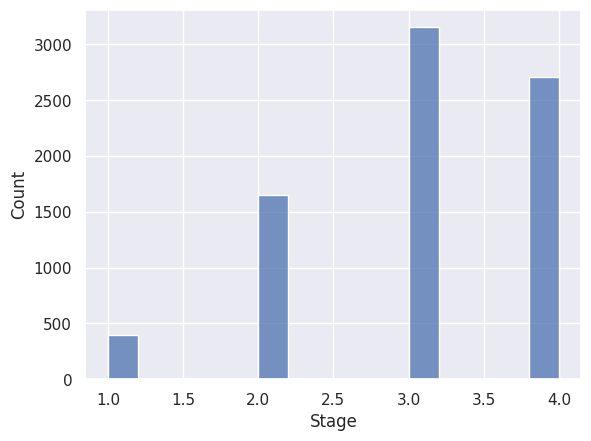

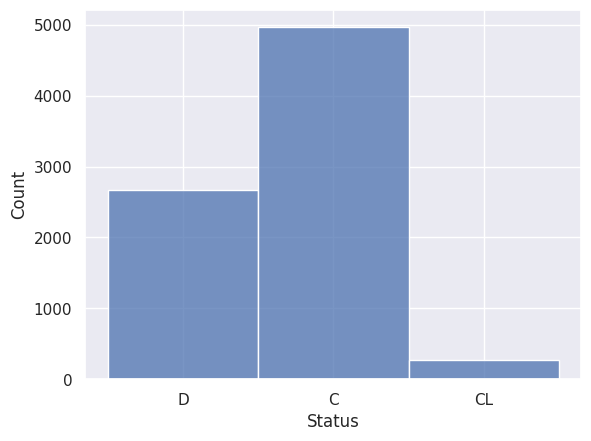

In [244]:
for i in category.columns:
    sns.histplot(data=category,x=i)
    plt.show()

In [245]:
category = df[['Drug', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema','Stage', 'Status']]

In [246]:
category = df[['Drug', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema','Stage', 'Status']]

In [247]:
category = df[['Drug', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema','Stage', 'Status']]

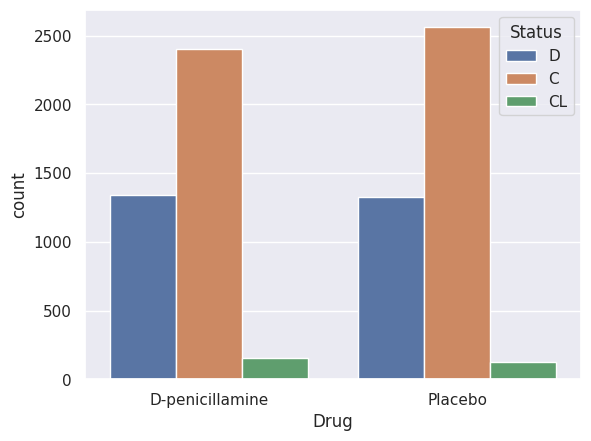

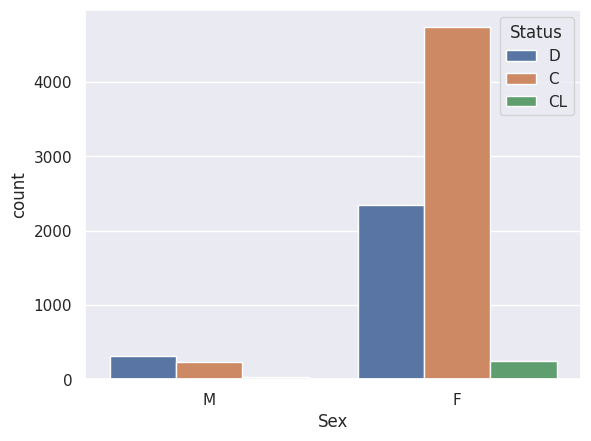

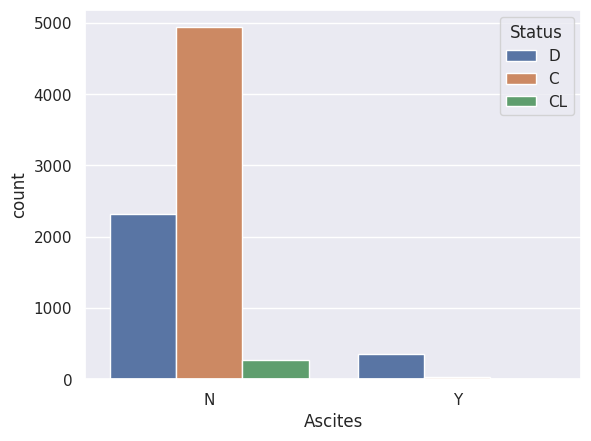

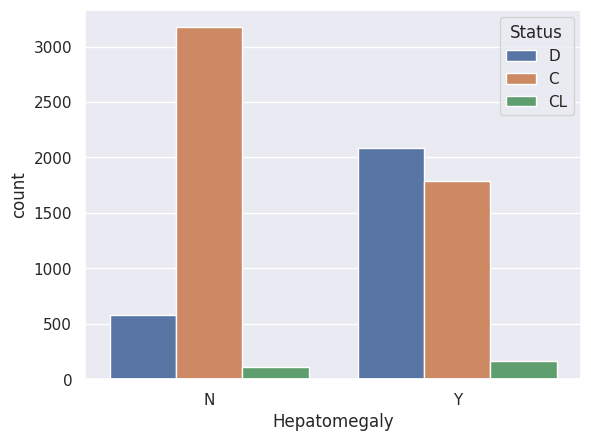

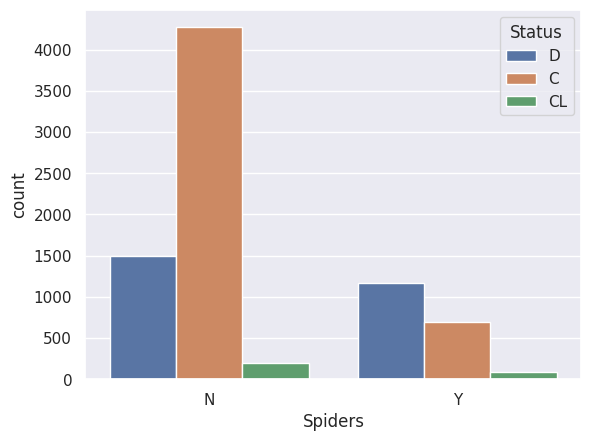

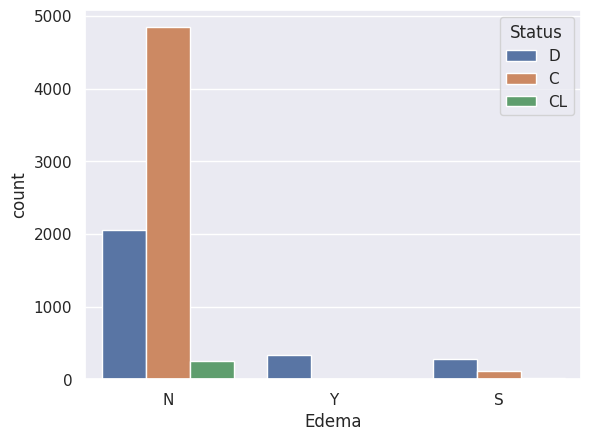

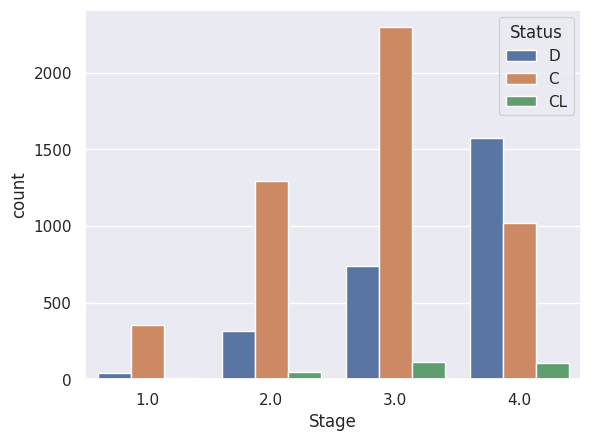

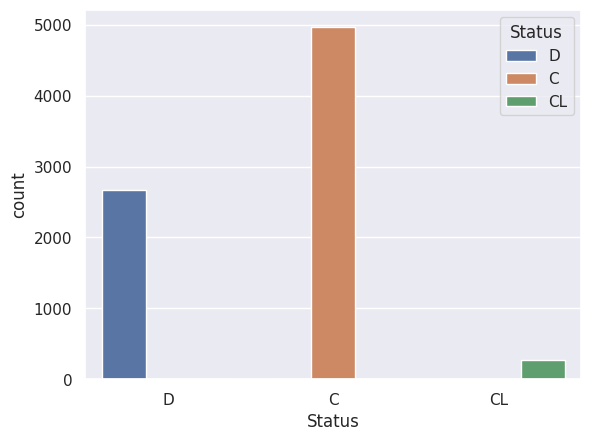

In [248]:
for i in category.columns:
    sns.countplot(data=category,x=i,hue='Status')
    plt.show()

In [249]:
df.nunique()

id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

<Axes: ylabel='count'>

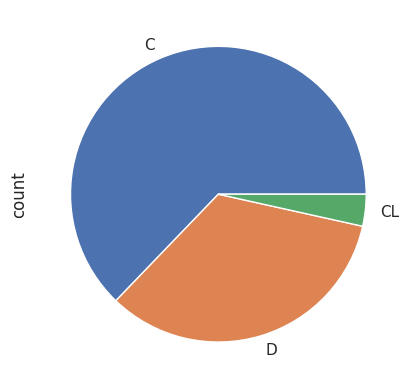

In [250]:
df['Status'].value_counts().plot.pie()

In [251]:
categorical_features = df.select_dtypes(include = 'object').columns
print("Categorical features: ", categorical_features)

Categorical features:  Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status'], dtype='object')


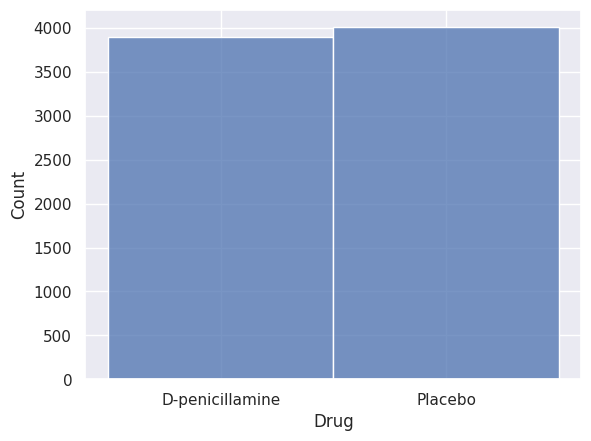

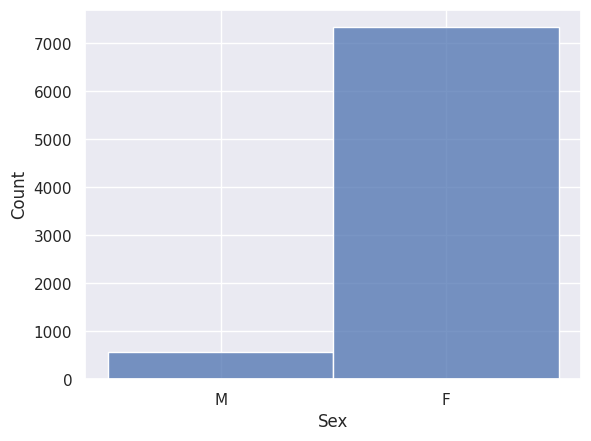

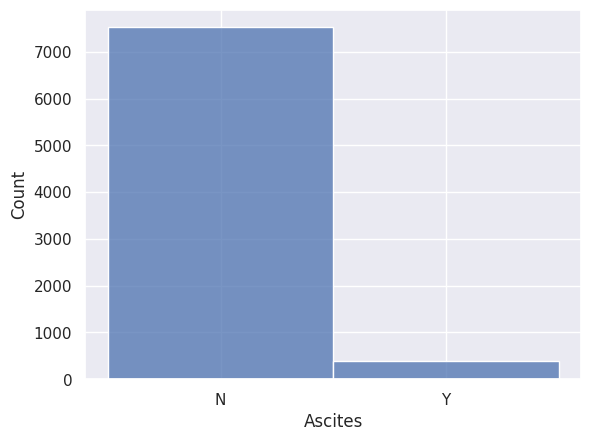

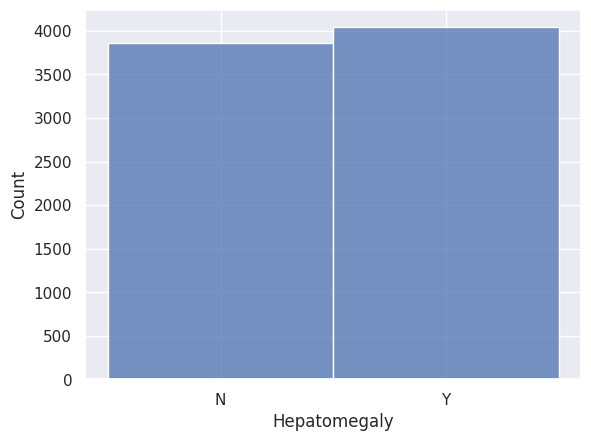

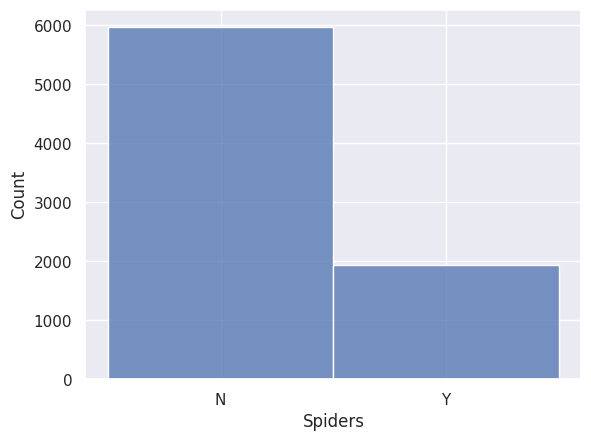

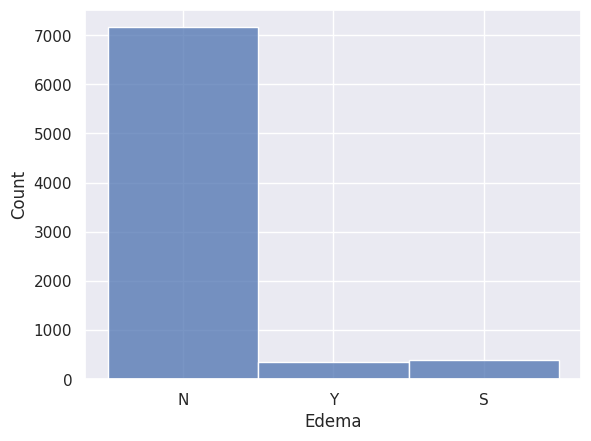

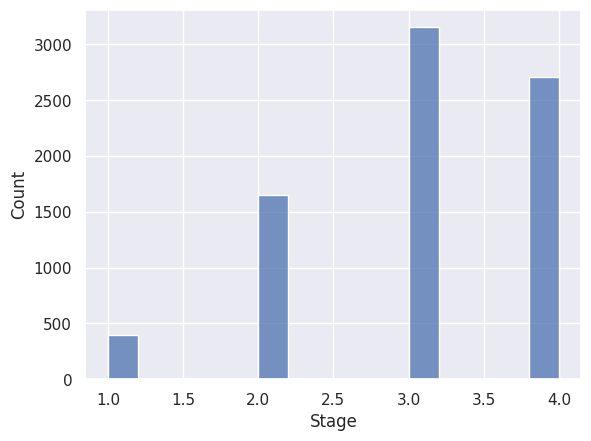

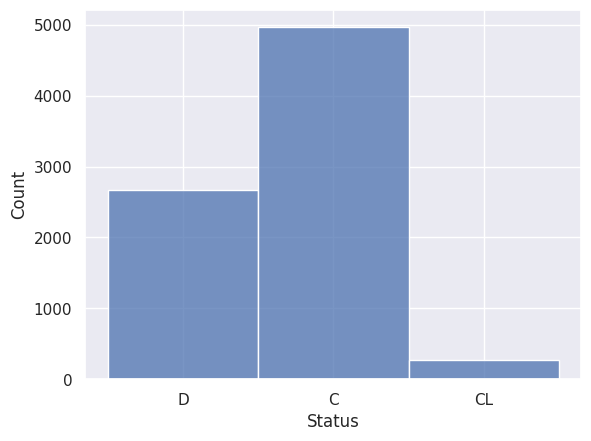

In [252]:
for i in category.columns:
    sns.histplot(data=category,x=i)
    plt.show()

In [253]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in categorical_features:
    df[i] = encoder.fit_transform(df[i])

In [254]:
df

id  N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
0        0     999     0  21532    1        0             0        0      0   
1        1    2574     1  19237    0        0             0        0      0   
2        2    3428     1  13727    0        0             1        1      2   
3        3    2576     1  18460    0        0             0        0      0   
4        4     788     1  16658    0        0             1        0      0   
...    ...     ...   ...    ...  ...      ...           ...      ...    ...   
7900  7900    1166     0  16839    0        0             0        0      0   
7901  7901    1492     1  17031    0        0             1        0      0   
7902  7902    1576     0  25873    0        0             0        1      1   
7903  7903    3584     0  22960    1        0             1        0      0   
7904  7904    1978     0  19237    0        0             0        0      0   

      Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0           2.3        316.0     3.35   172.0    1601.0  179.80   
1           0.9        364.0     3.54    63.0    1440.0  134.85   
2           3.3        299.0     3.55   131.0    1029.0  119.35   
3           0.6        256.0     3.50    58.0    1653.0   71.30   
4           1.1        346.0     3.65    63.0    1181.0  125.55   
...         ...          ...      ...     ...       ...     ...   
7900        0.8        309.0     3.56    38.0    1629.0   79.05   
7901        0.9        260.0     3.43    62.0    1440.0  142.00   
7902        2.0        225.0     3.19    51.0     933.0   69.75   
7903        0.7        248.0     2.75    32.0    1003.0   57.35   
7904        0.7        256.0     3.23    22.0     645.0   74.40   

      Tryglicerides  Platelets  Prothrombin  Stage  Status  
0              63.0      394.0          9.7    3.0       2  
1              88.0      361.0         11.0    3.0       0  
2              50.0      199.0         11.7    4.0       2  
3              96.0      269.0         10.7    3.0       0  
4              96.0      298.0         10.6    4.0       0  
...             ...        ...          ...    ...     ...  
7900          224.0      344.0          9.9    2.0       0  
7901           78.0      277.0         10.0    4.0       0  
7902           62.0      200.0         12.7    2.0       2  
7903          118.0      221.0         10.6    4.0       2  
7904           85.0      336.0         10.3    3.0       0  

[7905 rows x 20 columns]

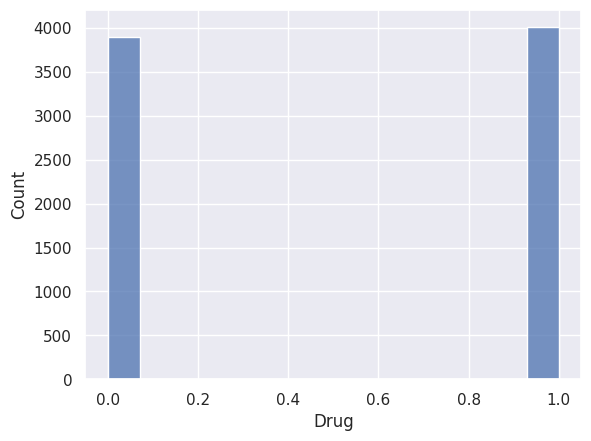

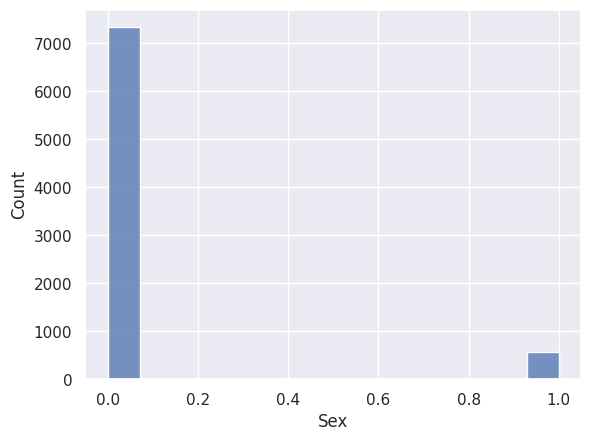

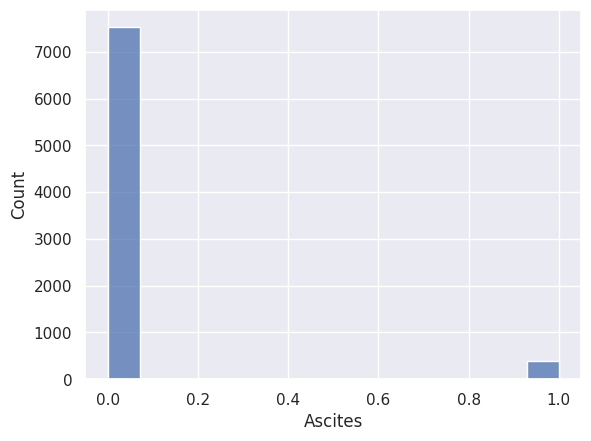

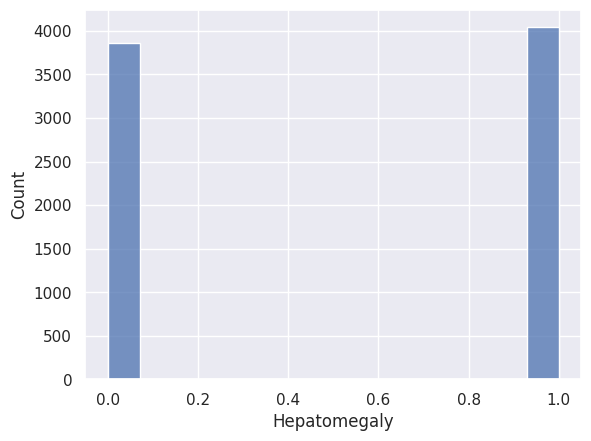

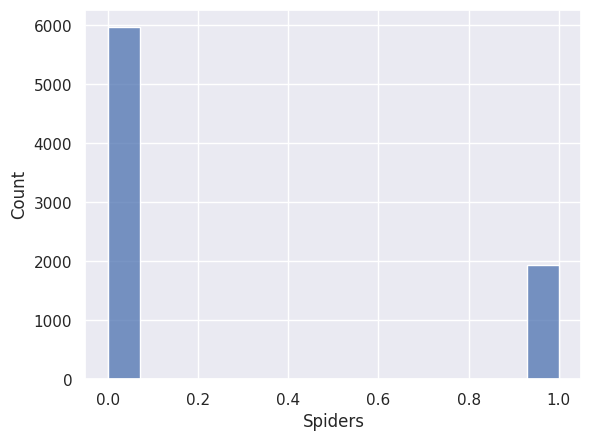

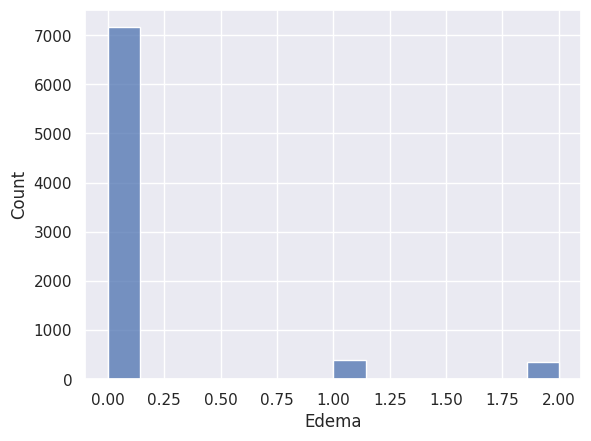

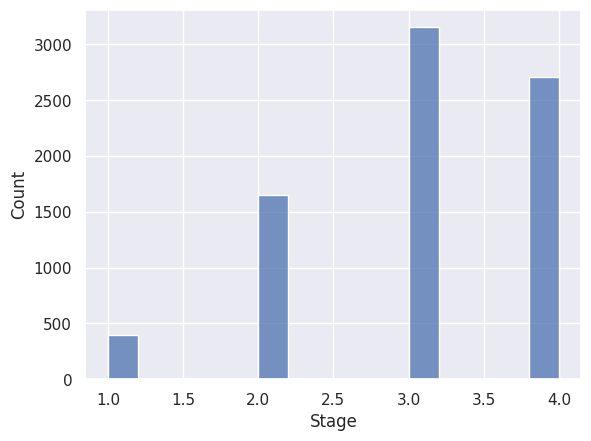

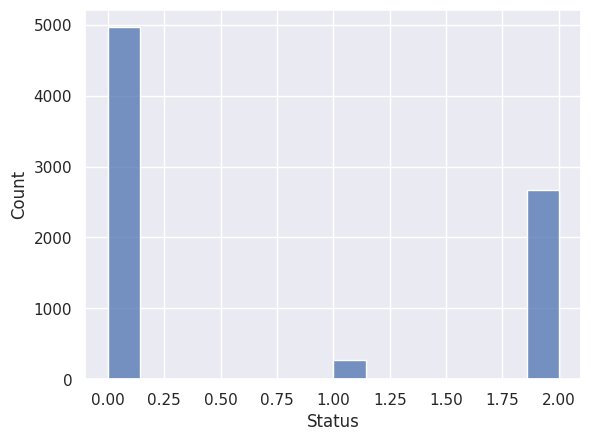

In [255]:
for i in category.columns:
    sns.histplot(data=df,x=i)
    plt.show()

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   int64  
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   int64  
 5   Ascites        7905 non-null   int64  
 6   Hepatomegaly   7905 non-null   int64  
 7   Spiders        7905 non-null   int64  
 8   Edema          7905 non-null   int64  
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [257]:
sns.set(font_scale=3)

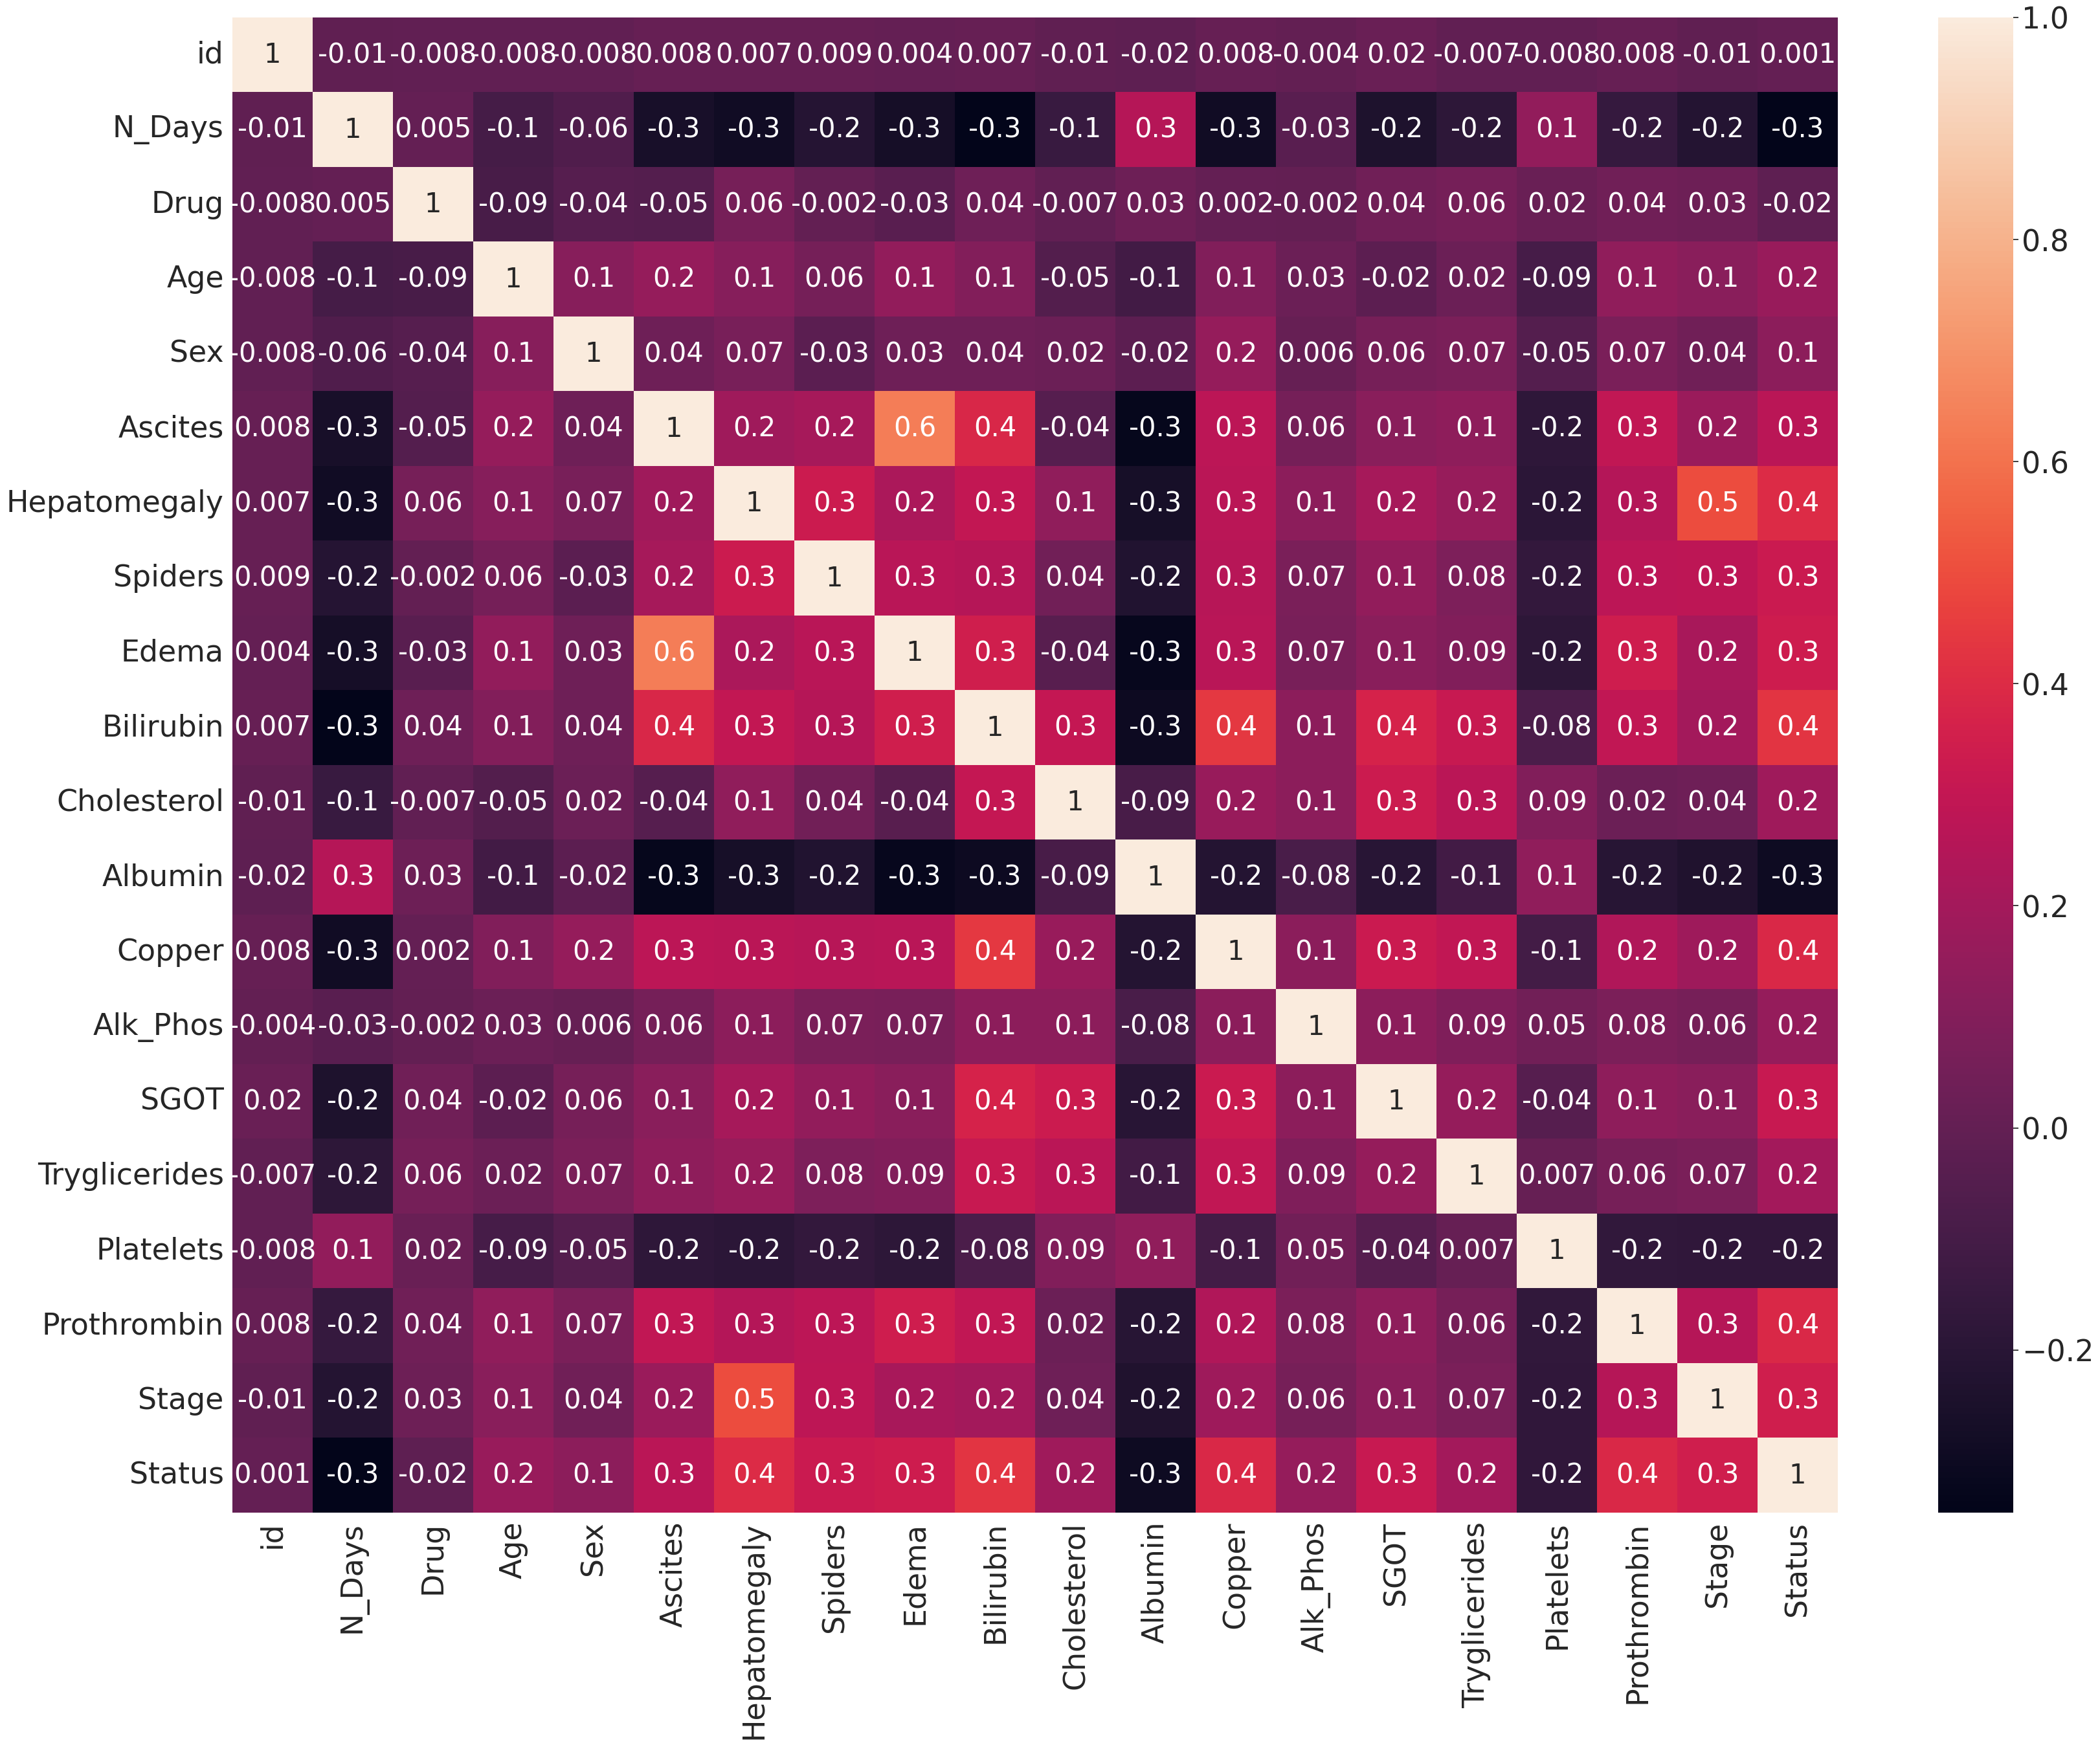

In [258]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),fmt='.1g',annot=True,annot_kws={'fontsize':30})
sns.set(font_scale=3)

In [259]:
# id is not contributing as shown in above heatmat
df = df.drop('id',axis=1)

In [260]:
sns.set(font_scale=1)

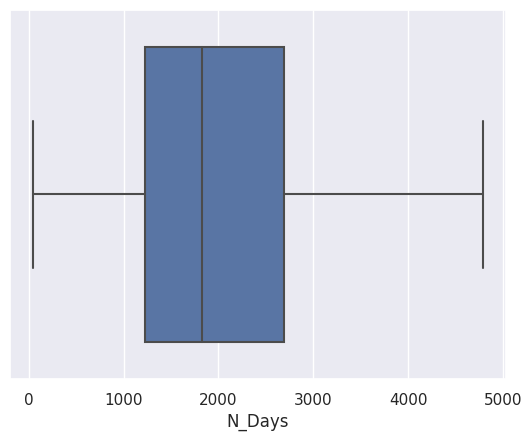

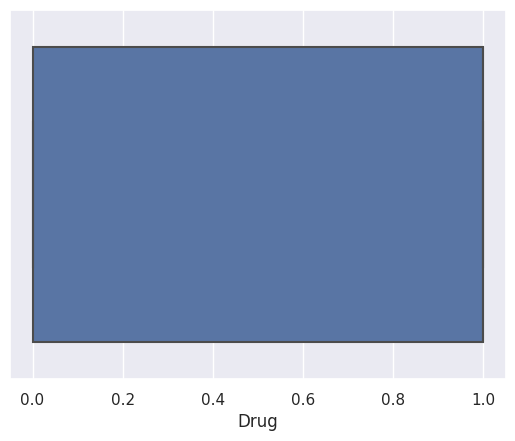

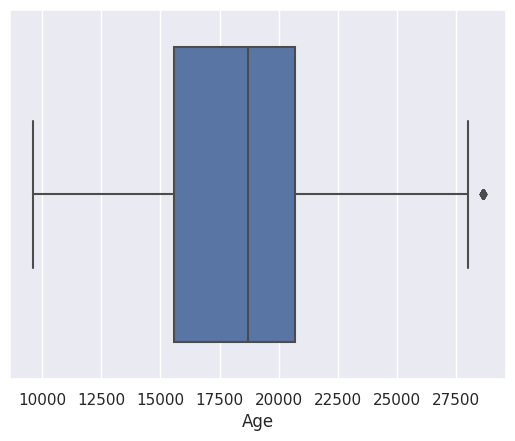

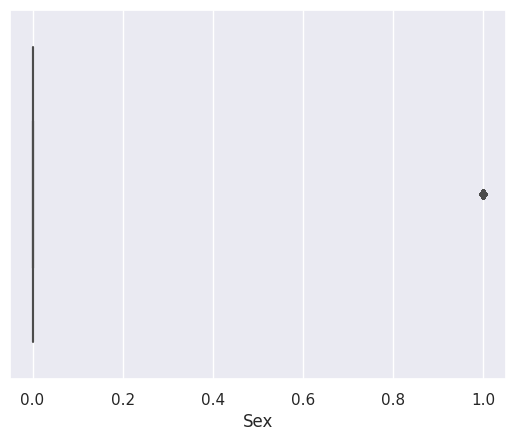

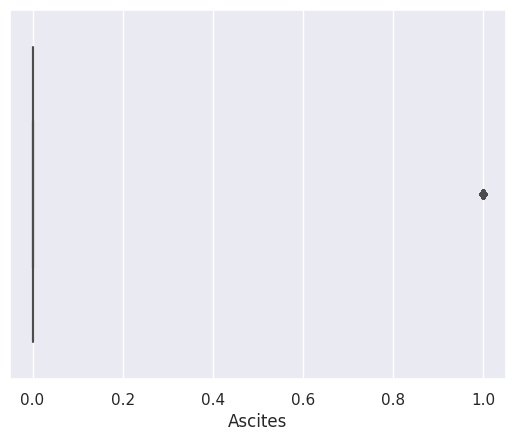

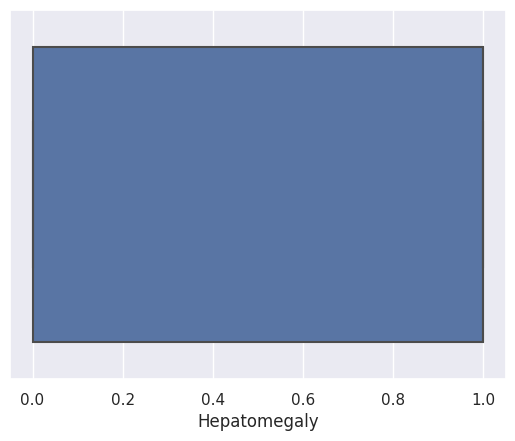

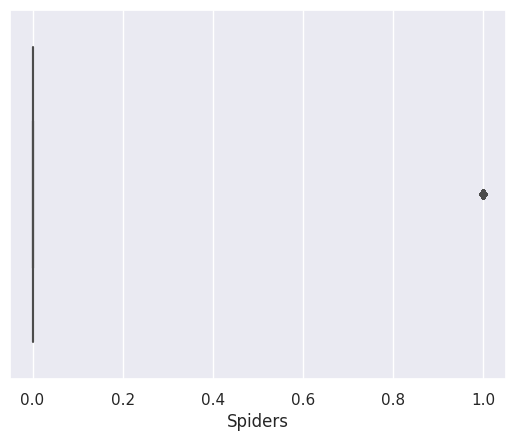

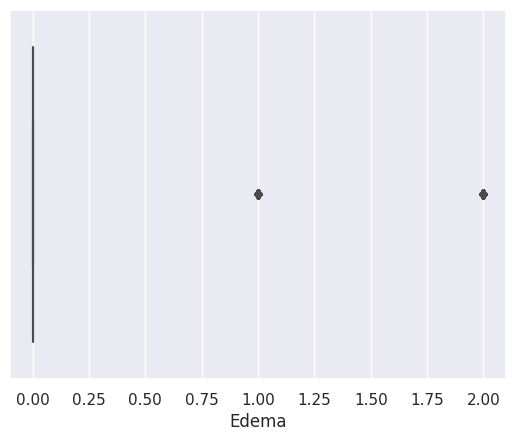

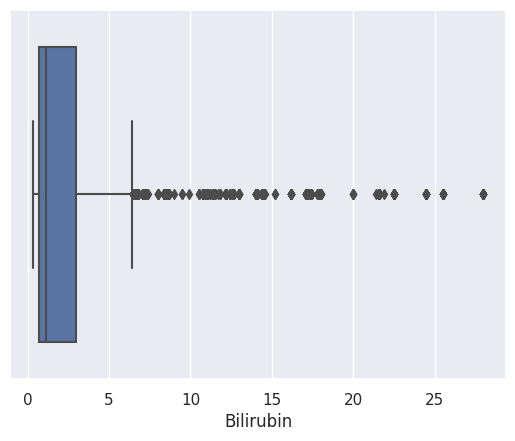

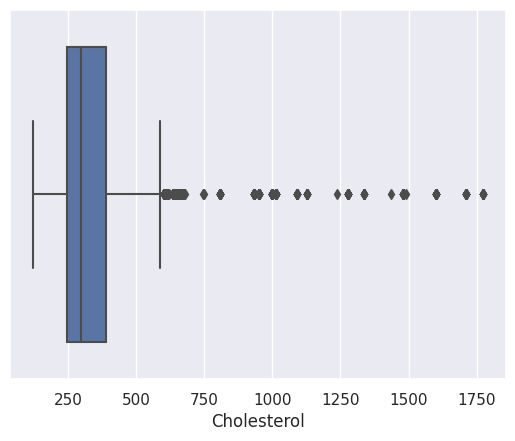

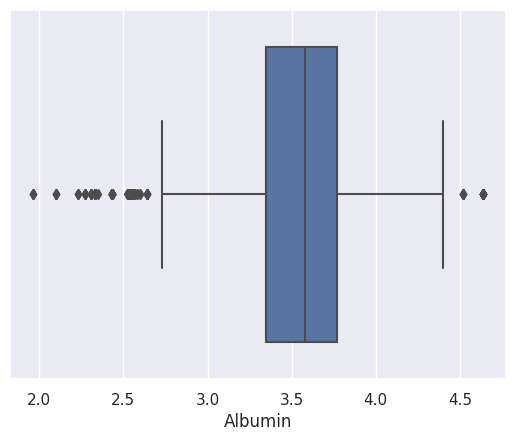

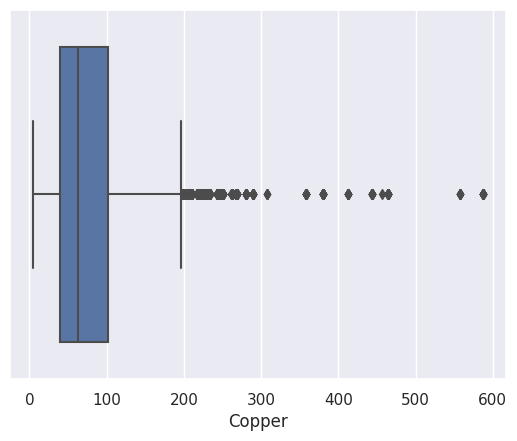

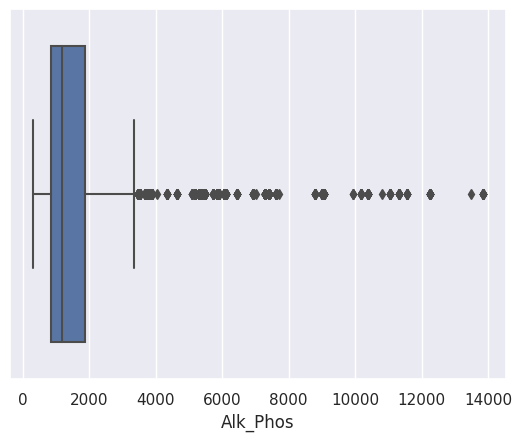

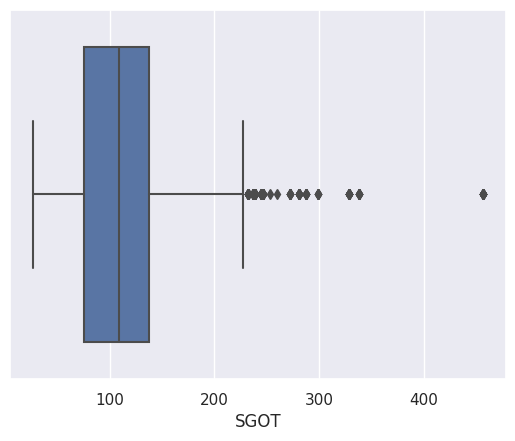

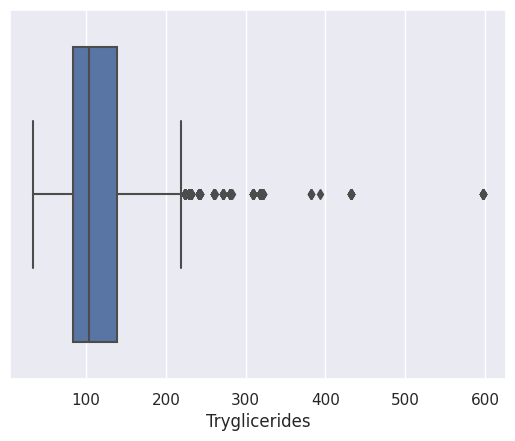

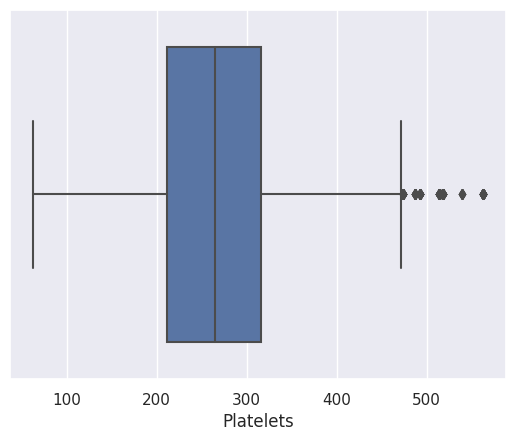

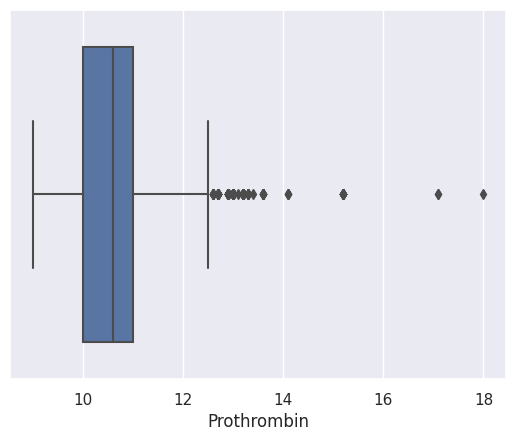

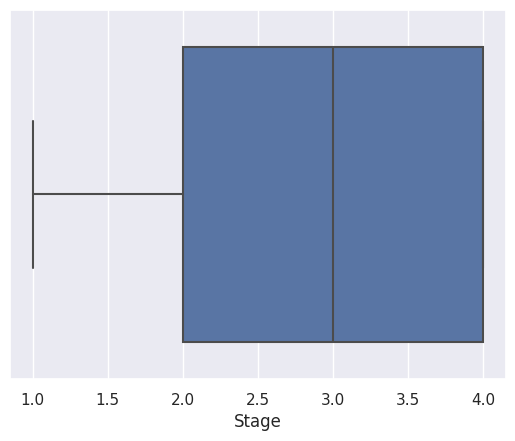

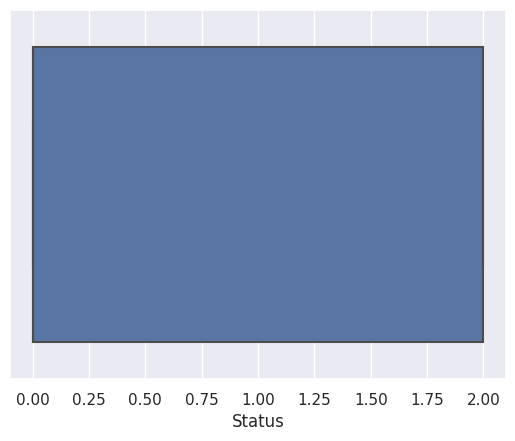

In [261]:
sns.set(font_scale=1)
for i in df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [262]:
import warnings
warnings.filterwarnings('ignore')

N_Days
0.4485746146042711


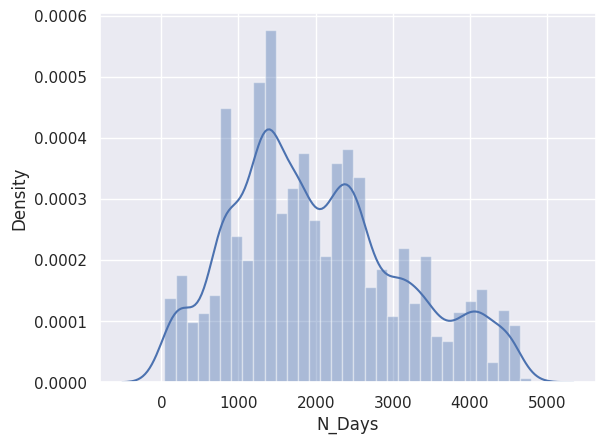

Drug
-0.02909858850571118


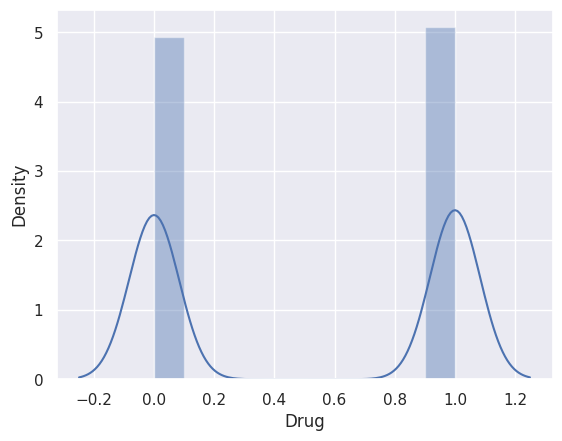

Age
0.08407534023432792


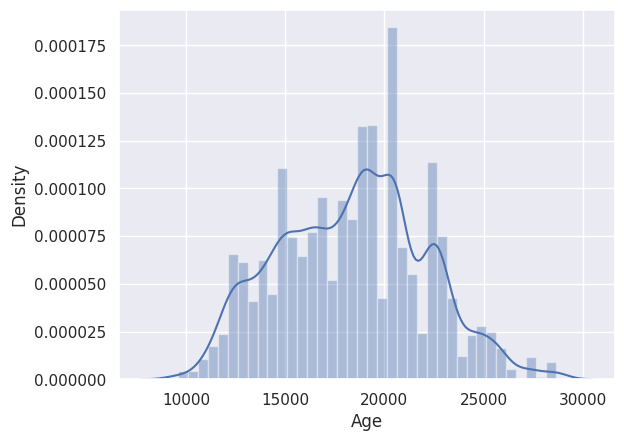

Sex
3.3121529373761582


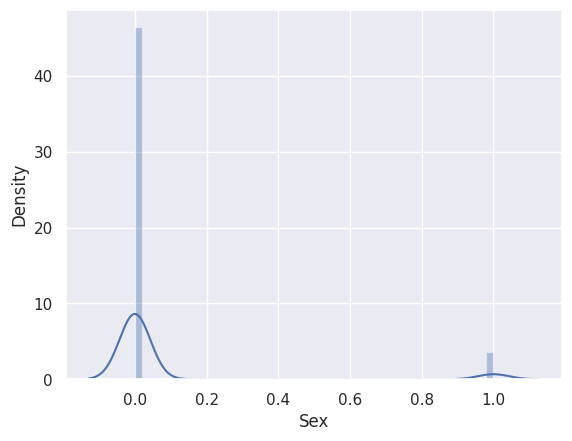

Ascites
4.225296429579562


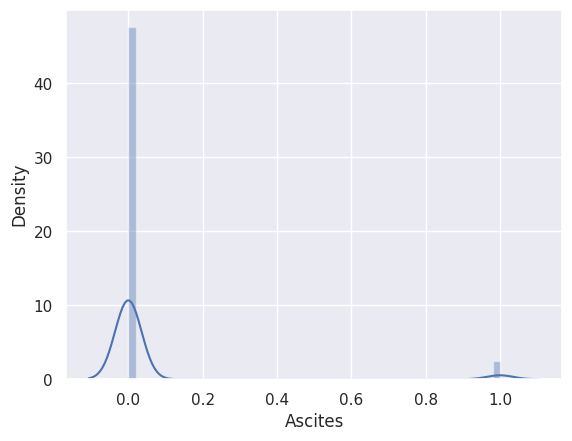

Hepatomegaly
-0.04529940757133396


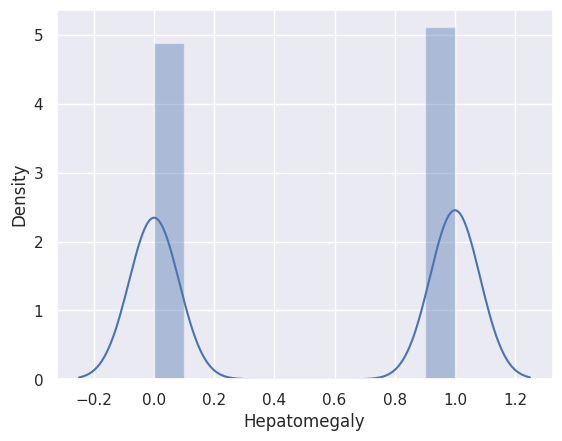

Spiders
1.1839983592506018


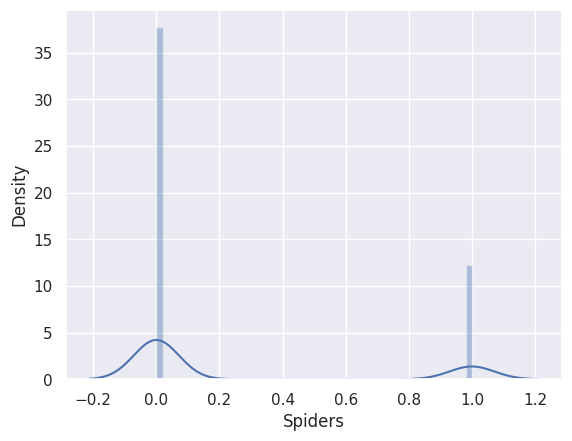

Edema
3.33359819444355


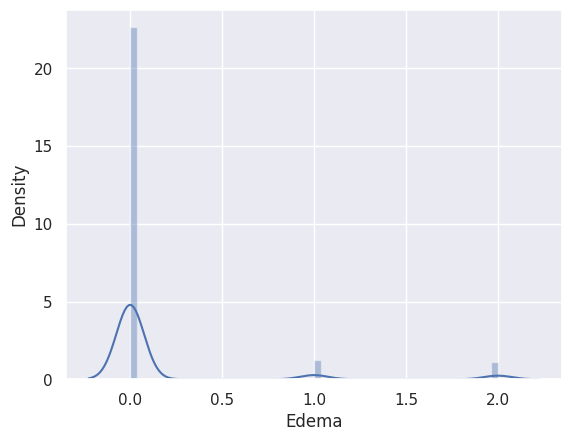

Bilirubin
3.3390615187679904


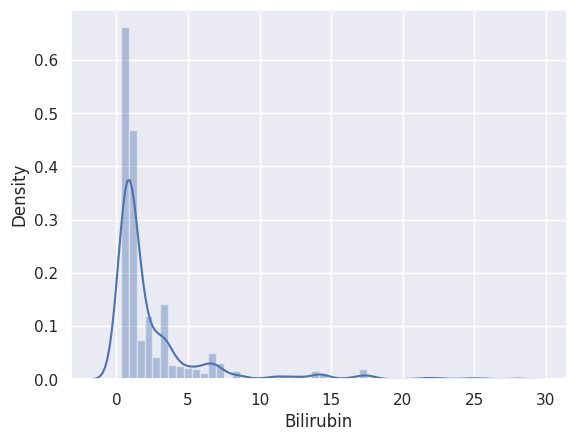

Cholesterol
3.6789592584545185


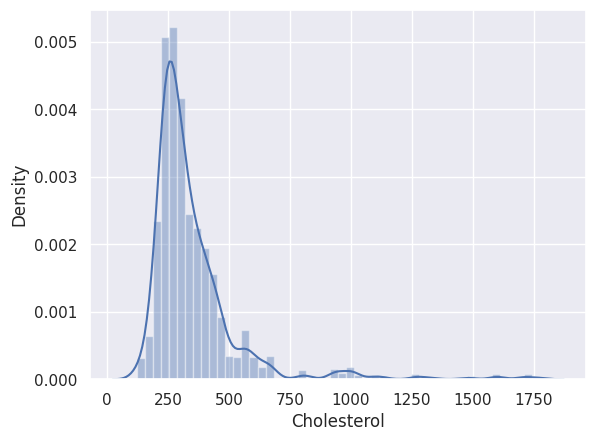

Albumin
-0.5610430164769734


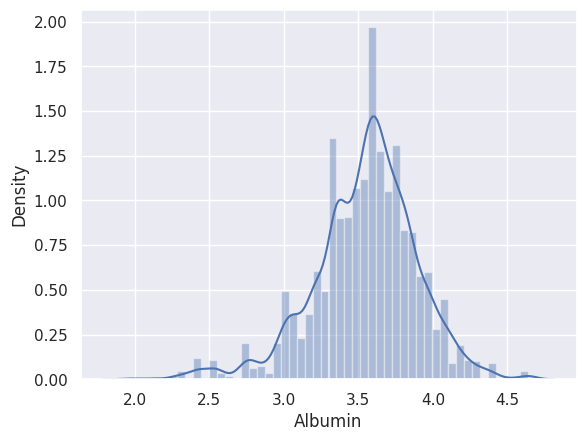

Copper
2.70122313105528


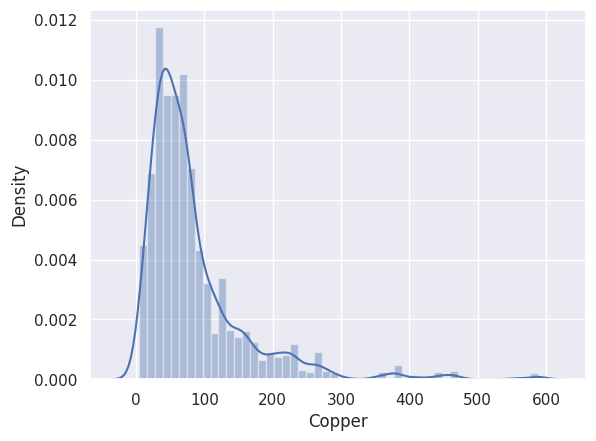

Alk_Phos
3.1949512883272457


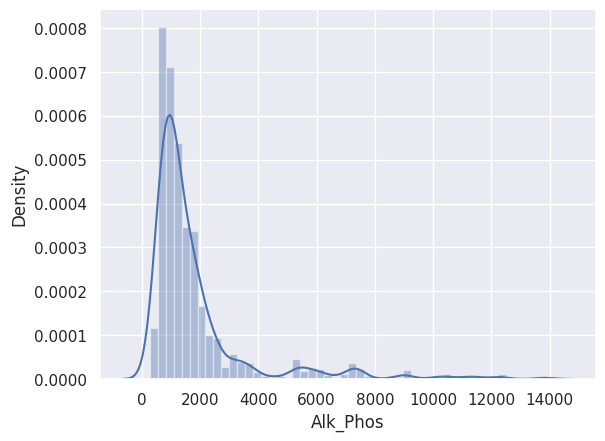

SGOT
1.5345144783481144


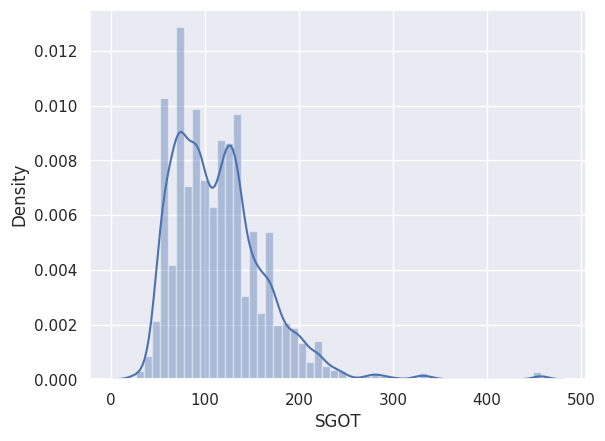

Tryglicerides
2.6334210282739865


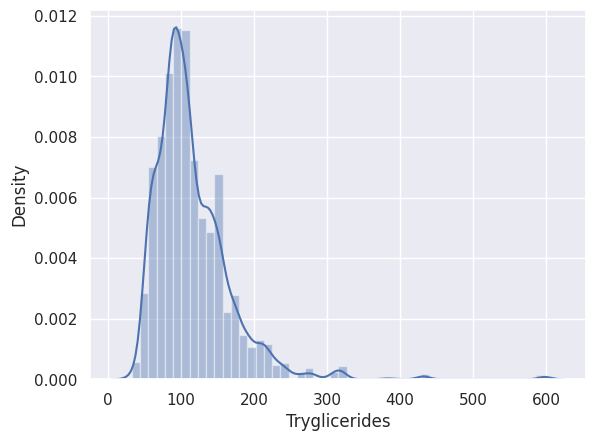

Platelets
0.4199682210364321


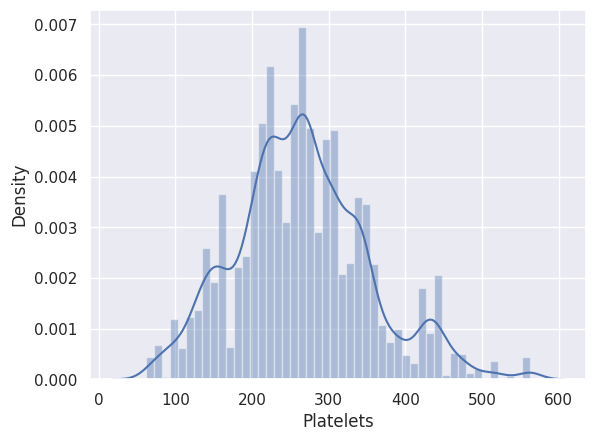

Prothrombin
1.292190771529963


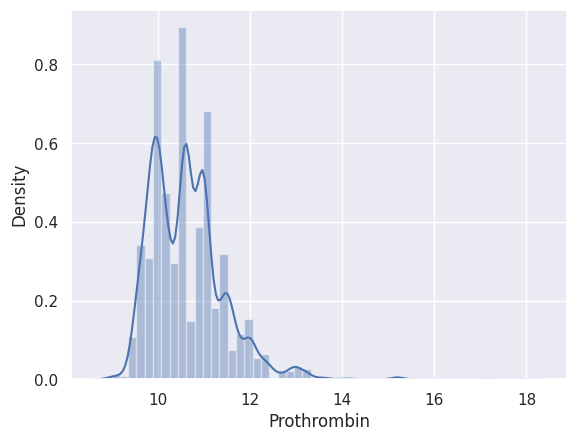

Stage
-0.5258732182675311


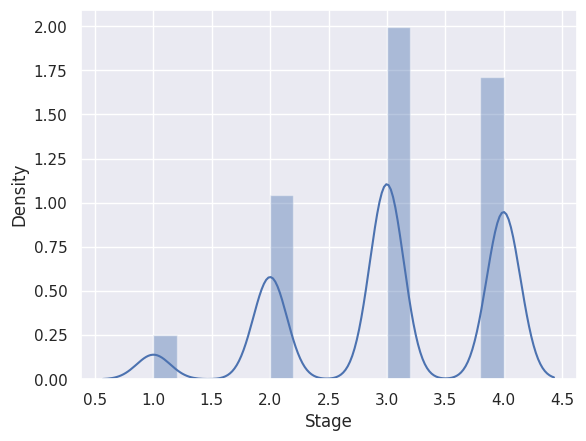

Status
0.6078725454540184


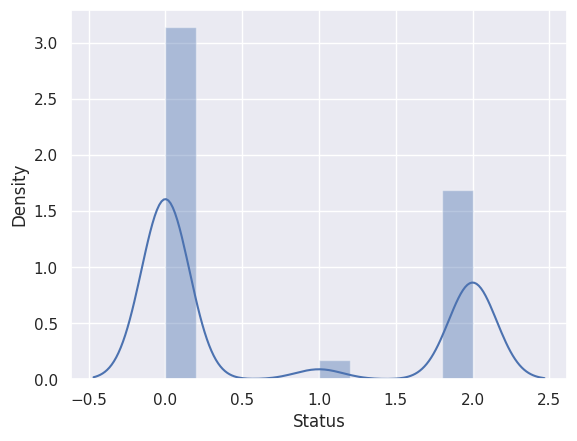

In [263]:
sns.set(font_scale=1)
from scipy.stats import skew
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

<Axes: >

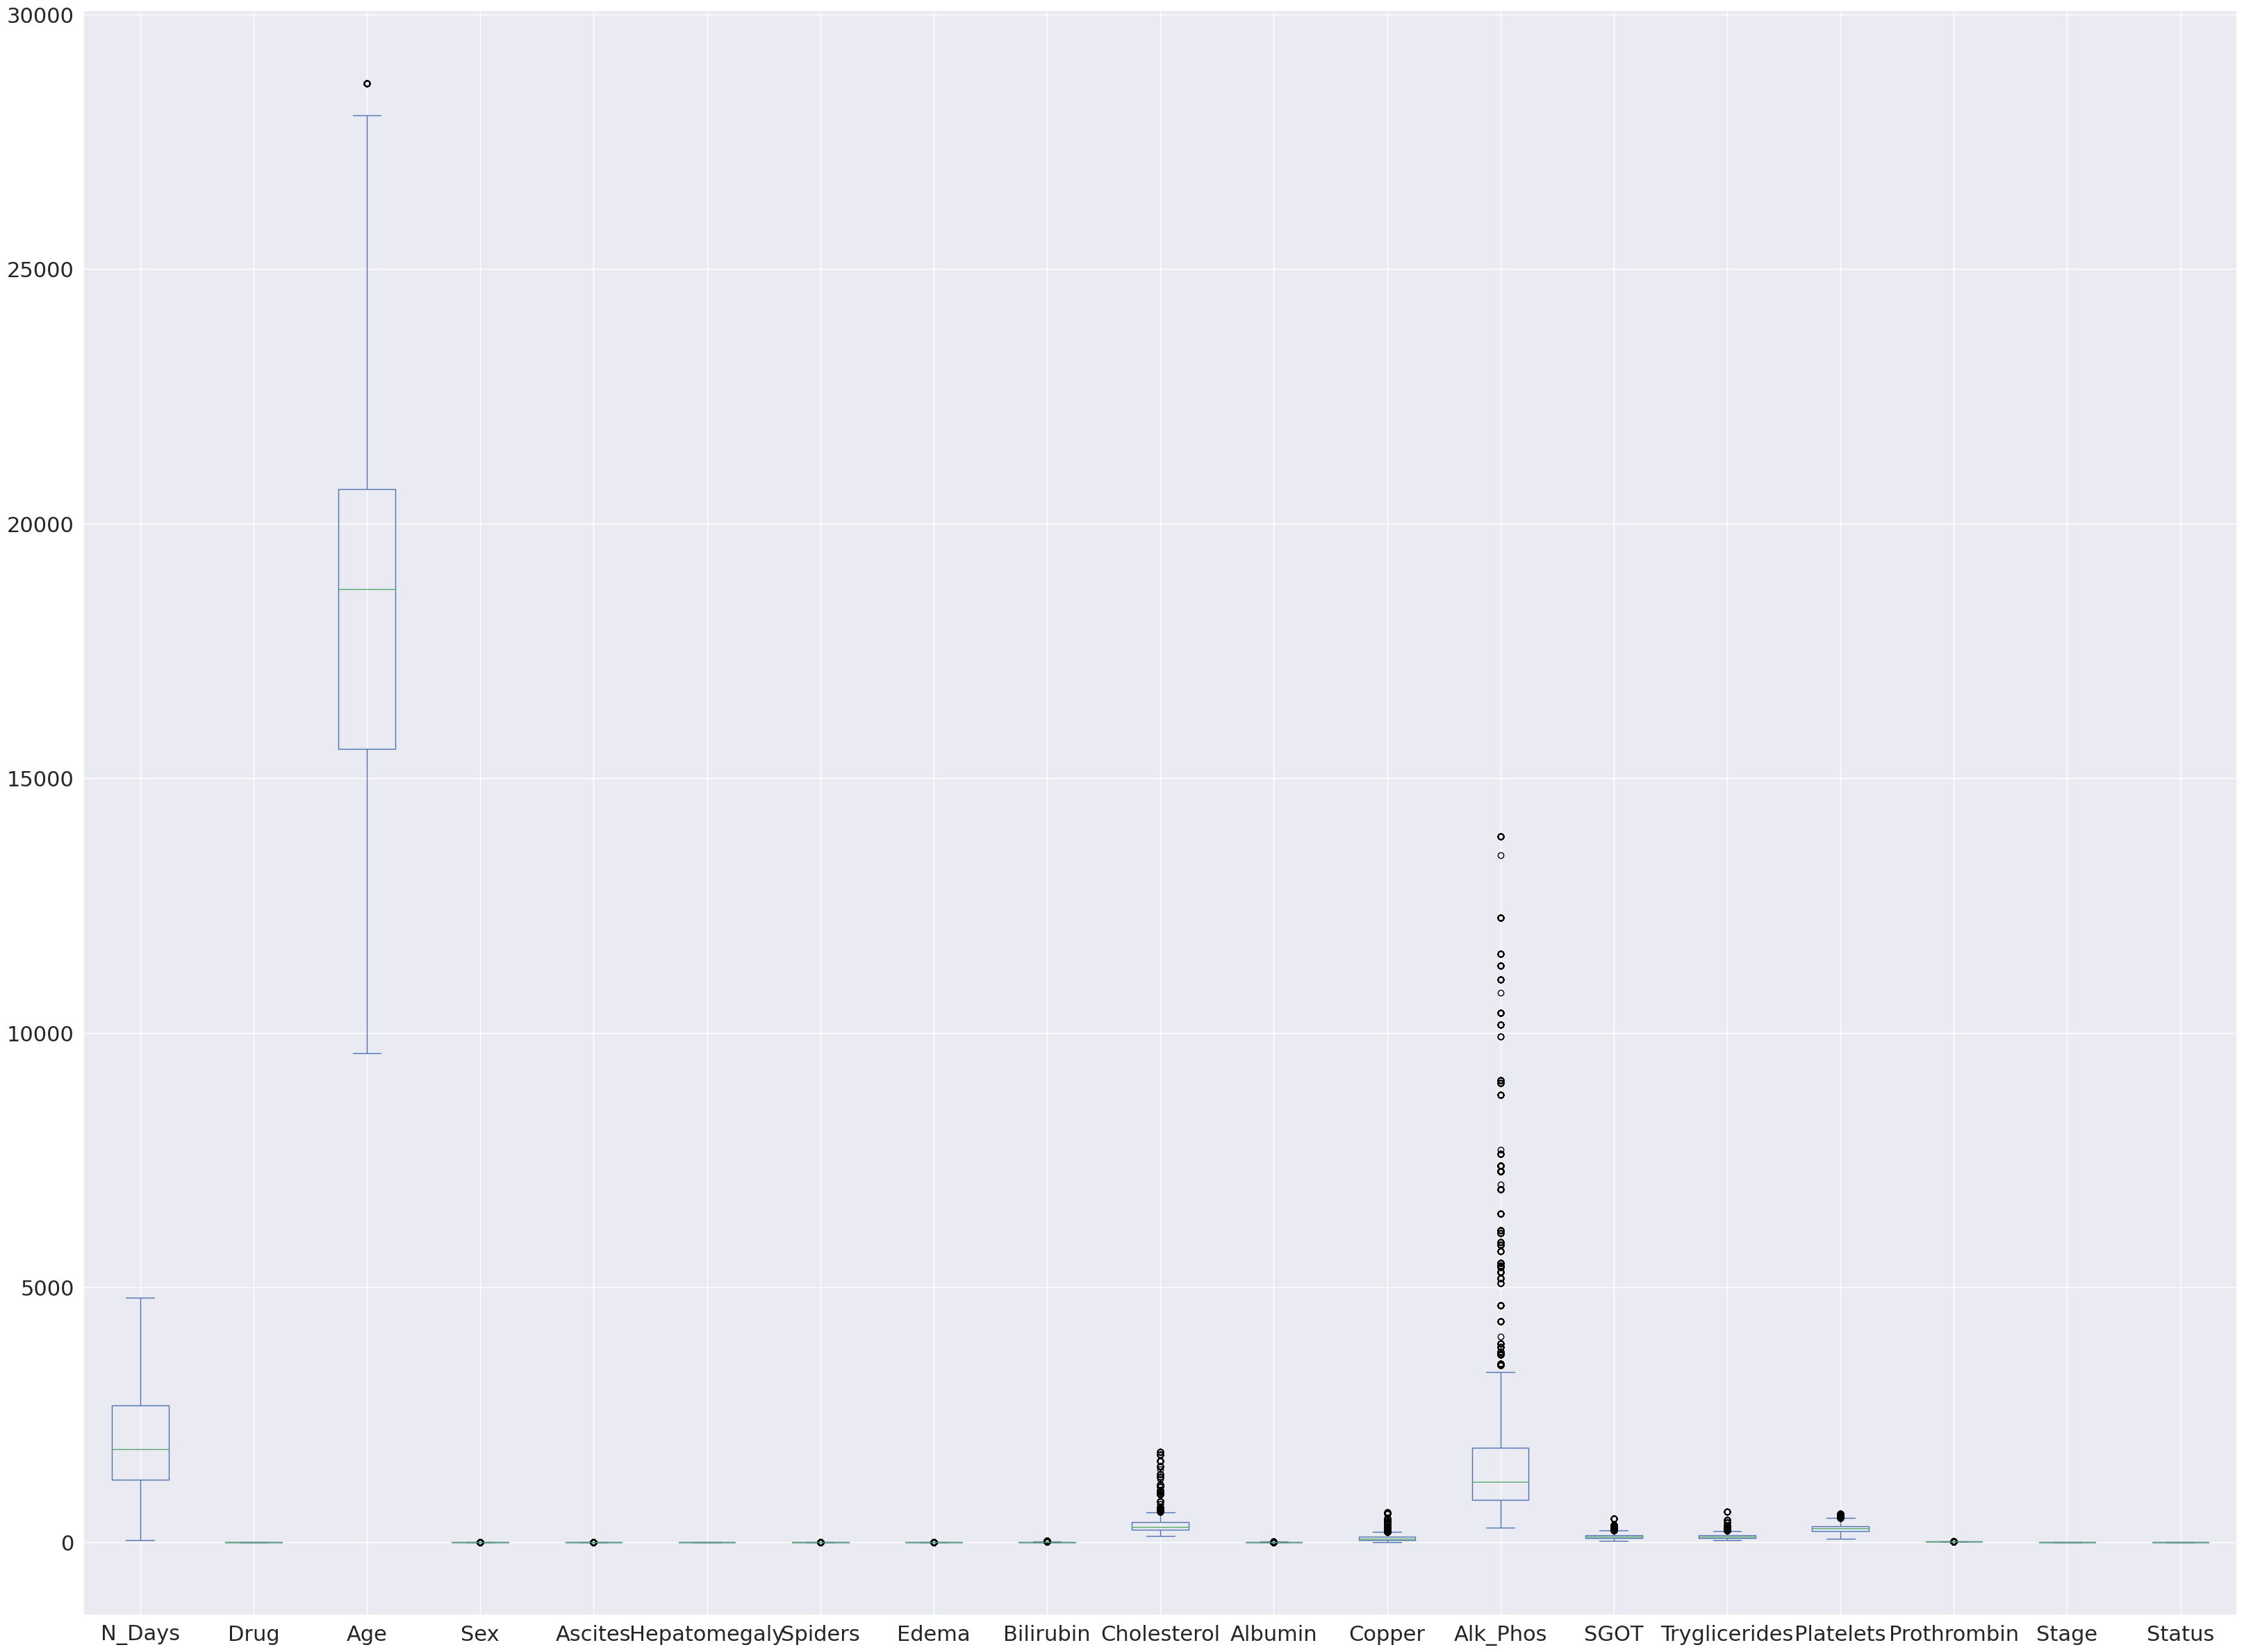

In [264]:
sns.set(font_scale=2)
df.plot(kind='box',figsize=(40,30))

In [265]:
df.skew()

N_Days           0.448660
Drug            -0.029104
Age              0.084091
Sex              3.312782
Ascites          4.226098
Hepatomegaly    -0.045308
Spiders          1.184223
Edema            3.334231
Bilirubin        3.339695
Cholesterol      3.679658
Albumin         -0.561150
Copper           2.701736
Alk_Phos         3.195558
SGOT             1.534806
Tryglicerides    2.633921
Platelets        0.420048
Prothrombin      1.292436
Stage           -0.525973
Status           0.607988
dtype: float64

In [266]:
df.columns

Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status'],
      dtype='object')

In [267]:
iqr = df['Bilirubin'].quantile(0.75)-df['Bilirubin'].quantile(0.25)
low = df['Bilirubin'].quantile(0.25)-(iqr*1.5)
up =  df['Bilirubin'].quantile(0.75)+(iqr*1.5)
print(low,up)

-2.75 6.449999999999999


In [268]:
df.loc[df['Bilirubin']>=6.5,'Bilirubin']=6.5

In [269]:
iqr = df['Cholesterol'].quantile(0.75)-df['Cholesterol'].quantile(0.25)
low = df['Cholesterol'].quantile(0.25)-(iqr*1.5)
up =  df['Cholesterol'].quantile(0.75)+(iqr*1.5)
print(low,up)

35.0 603.0


In [270]:
df.loc[df['Cholesterol']>=603,'Cholesterol']=603
df.loc[df['Cholesterol']<=35,'Cholesterol']=35

In [271]:
iqr = df['Copper'].quantile(0.75)-df['Copper'].quantile(0.25)
low = df['Copper'].quantile(0.25)-(iqr*1.5)
up =  df['Copper'].quantile(0.75)+(iqr*1.5)
print(low,up)

-55.5 196.5


In [272]:
df.loc[df['Copper']>=196,'Copper']=196

In [273]:
iqr = df['Alk_Phos'].quantile(0.75)-df['Alk_Phos'].quantile(0.25)
low = df['Alk_Phos'].quantile(0.25)-(iqr*1.5)
up =  df['Alk_Phos'].quantile(0.75)+(iqr*1.5)
print(low,up)

-700.5 3391.5


In [274]:
df.loc[df['Alk_Phos']>=3391,'Alk_Phos']=3391

In [275]:
iqr = df['SGOT'].quantile(0.75)-df['SGOT'].quantile(0.25)
low = df['SGOT'].quantile(0.25)-(iqr*1.5)
up =  df['SGOT'].quantile(0.75)+(iqr*1.5)
print(low,up)

-17.04999999999997 230.94999999999996


In [276]:
df.loc[df['SGOT']>=231,'SGOT']=231

In [277]:
iqr = df['Tryglicerides'].quantile(0.75)-df['Tryglicerides'].quantile(0.25)
low = df['Tryglicerides'].quantile(0.25)-(iqr*1.5)
up =  df['Tryglicerides'].quantile(0.75)+(iqr*1.5)
print(low,up)

1.5 221.5


In [278]:
df.loc[df['Tryglicerides']>=221,'Tryglicerides']=221
df.loc[df['Tryglicerides']<=1.5,'Tryglicerides']=1.5

.

.

In [279]:
up = df['Albumin'].mean()+3*df['Albumin'].std()
low = df['Albumin'].mean()-3*df['Albumin'].std()
print(up,low)

4.586835013880599 2.509810147409724


In [280]:
df.loc[df['Albumin']>=4.6,'Albumin']=4.6
df.loc[df['Albumin']<=2.5,'Albumin']=2.5

In [281]:
up = df['Platelets'].mean()+3*df['Platelets'].std()
low = df['Platelets'].mean()-3*df['Platelets'].std()
print(up,low)

527.6257045501891 2.8322334637262543


In [282]:
df.loc[df['Platelets']>=527,'Platelets']=527
df.loc[df['Platelets']<=2.8,'Platelets']=2.8

<Axes: >

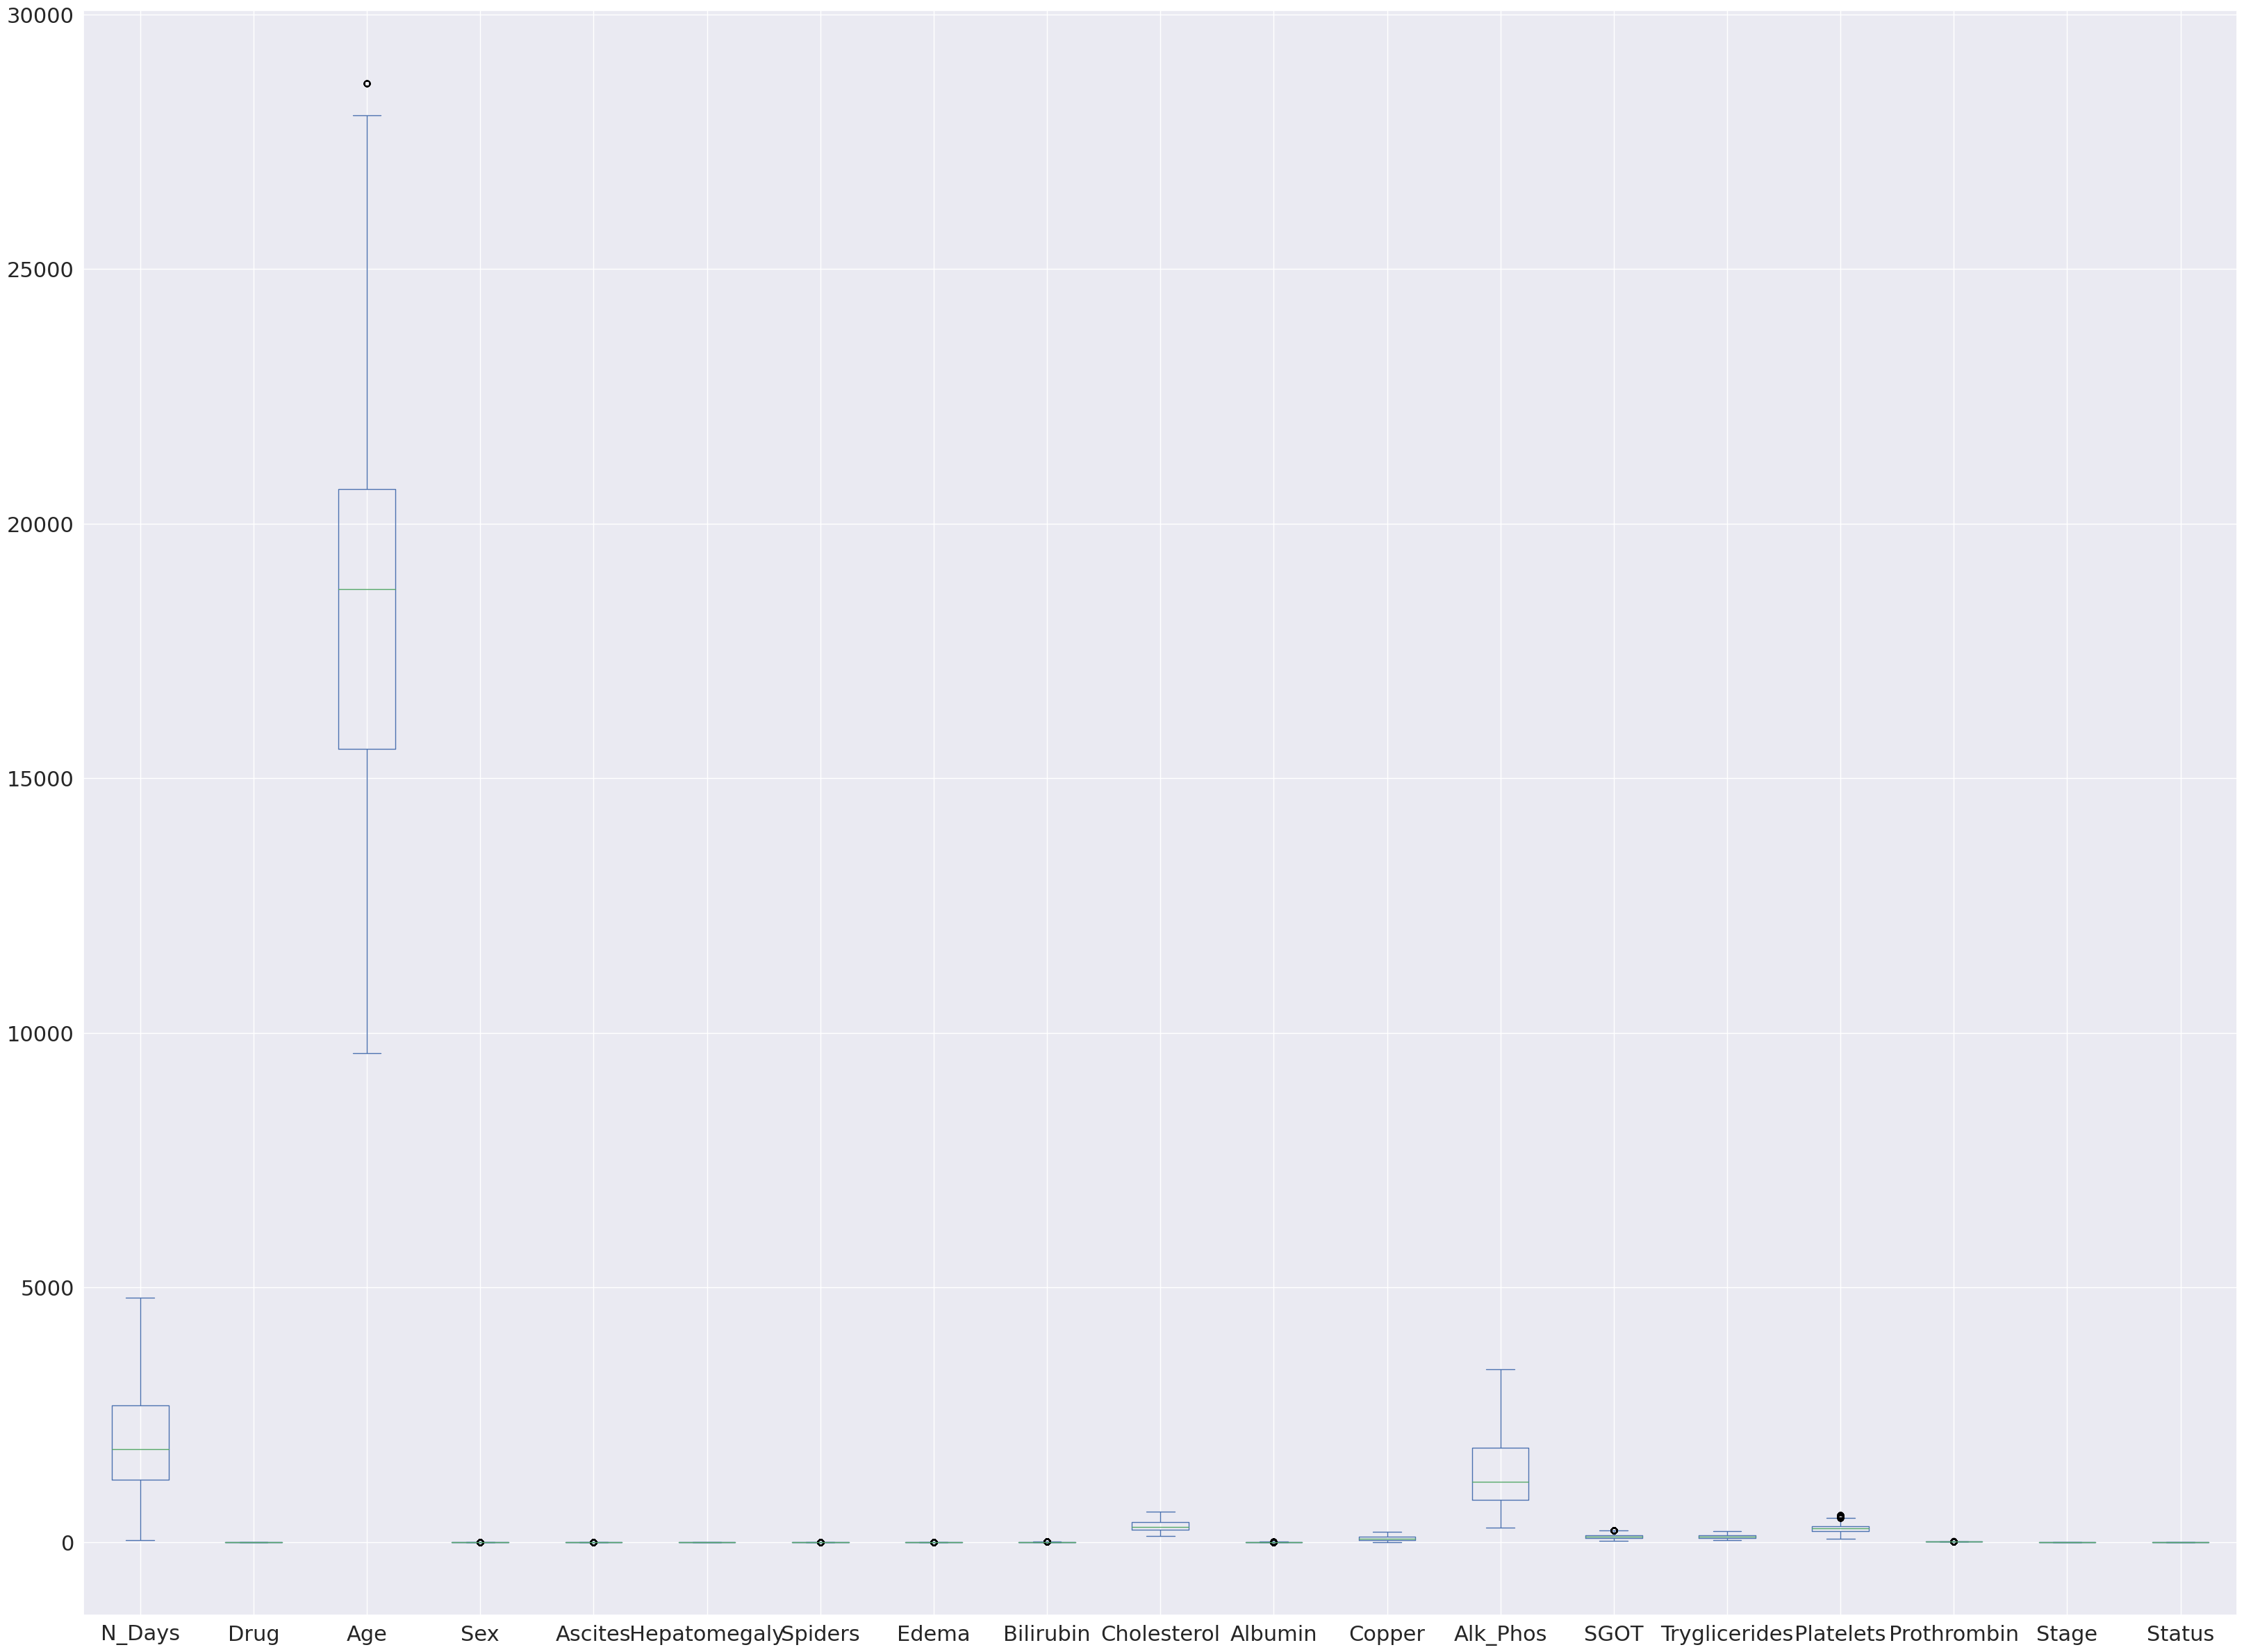

In [283]:
sns.set(font_scale=2)
df.plot(kind='box',figsize=(40,30))

In [284]:
df.skew()

N_Days           0.448660
Drug            -0.029104
Age              0.084091
Sex              3.312782
Ascites          4.226098
Hepatomegaly    -0.045308
Spiders          1.184223
Edema            3.334231
Bilirubin        1.364781
Cholesterol      1.002899
Albumin         -0.443712
Copper           1.034936
Alk_Phos         1.076160
SGOT             0.643556
Tryglicerides    0.809858
Platelets        0.372767
Prothrombin      1.292436
Stage           -0.525973
Status           0.607988
dtype: float64

N_Days
0.4485746146042711


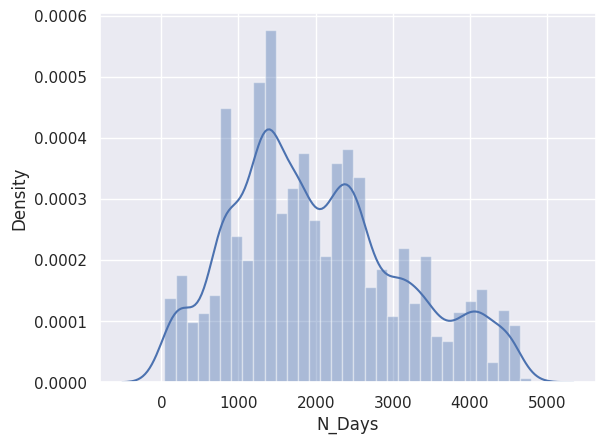

Drug
-0.02909858850571118


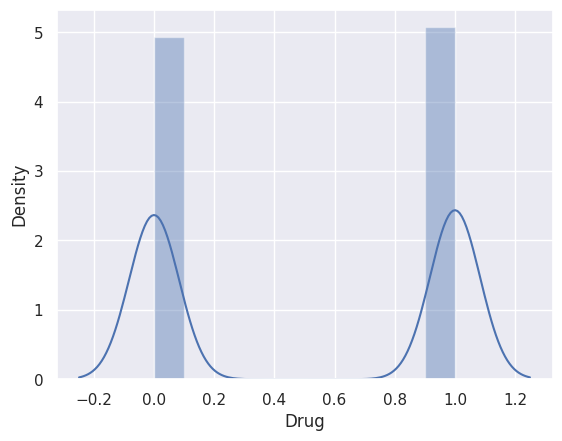

Age
0.08407534023432792


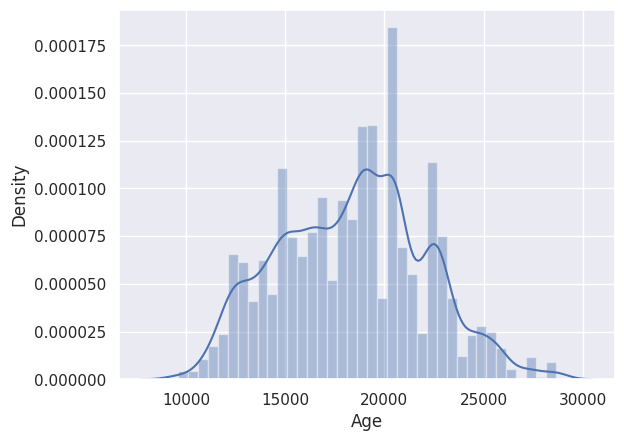

Sex
3.3121529373761582


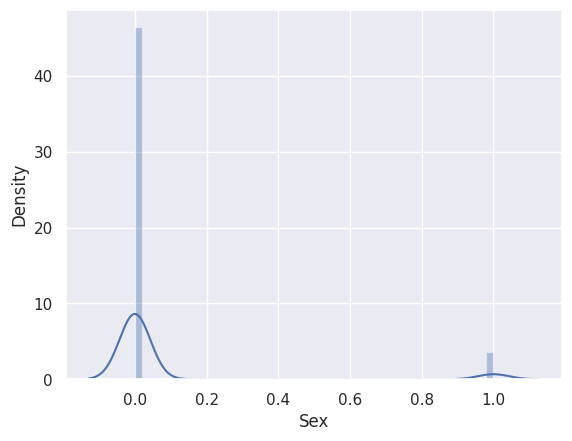

Ascites
4.225296429579562


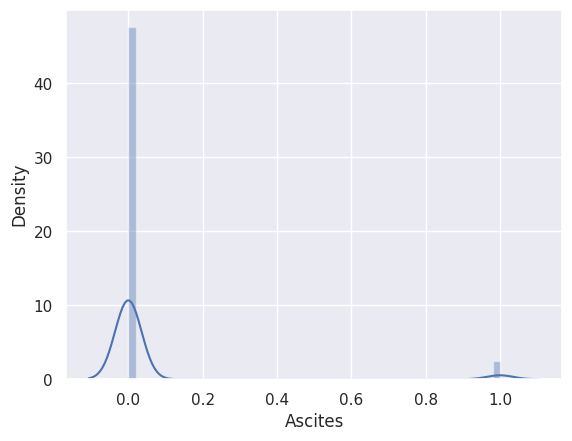

Hepatomegaly
-0.04529940757133396


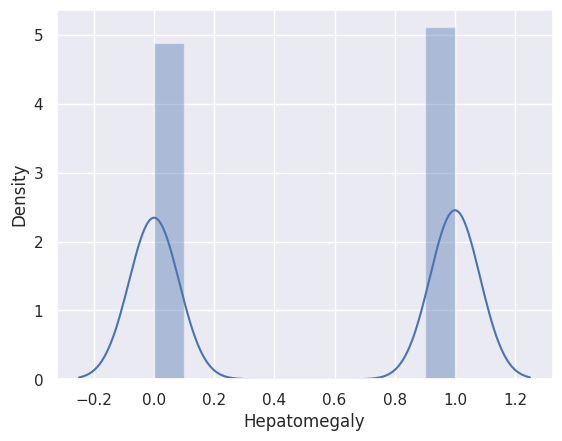

Spiders
1.1839983592506018


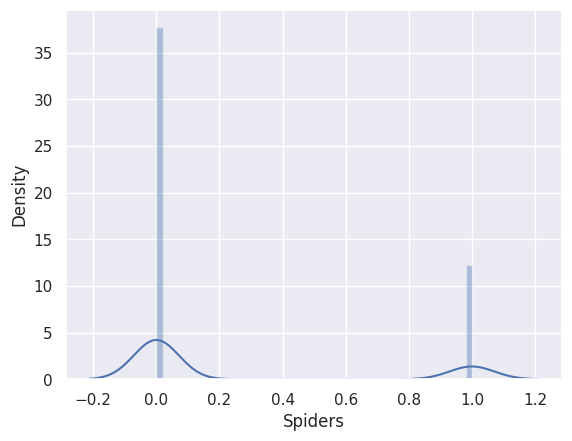

Edema
3.33359819444355


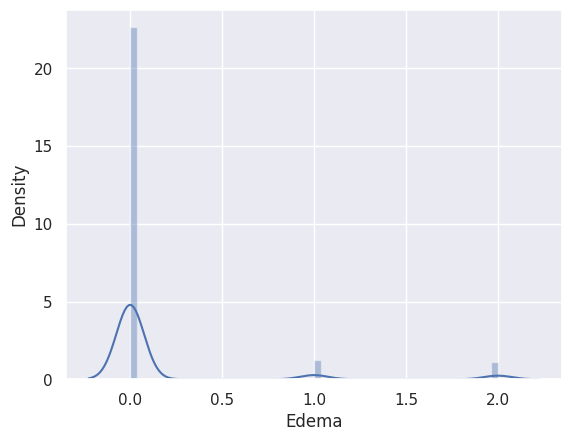

Bilirubin
1.364522081495919


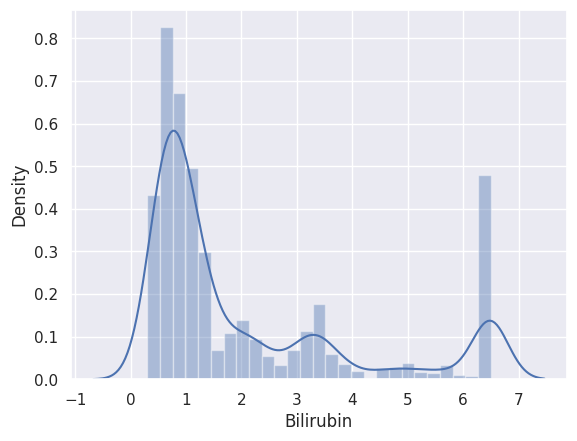

Cholesterol
1.0027086416495026


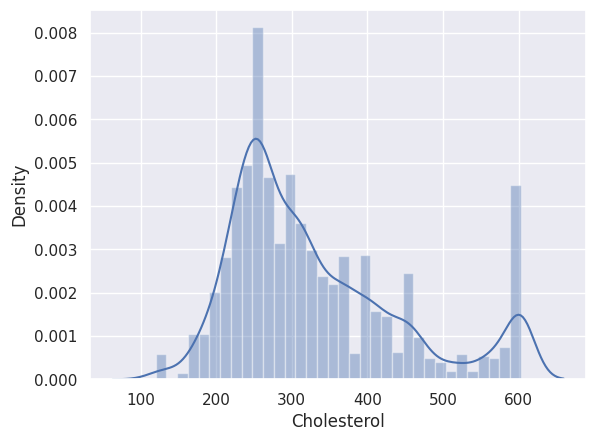

Albumin
-0.4436278639247553


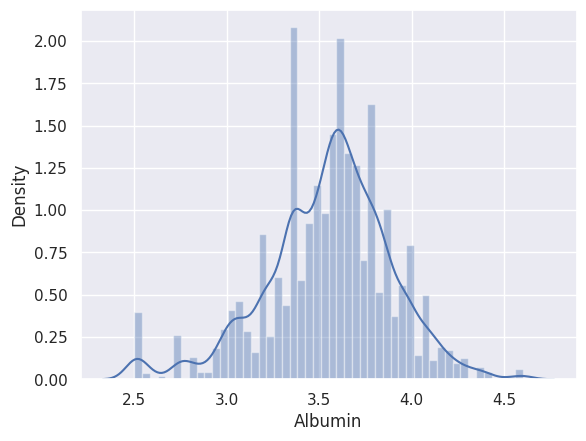

Copper
1.034739757844206


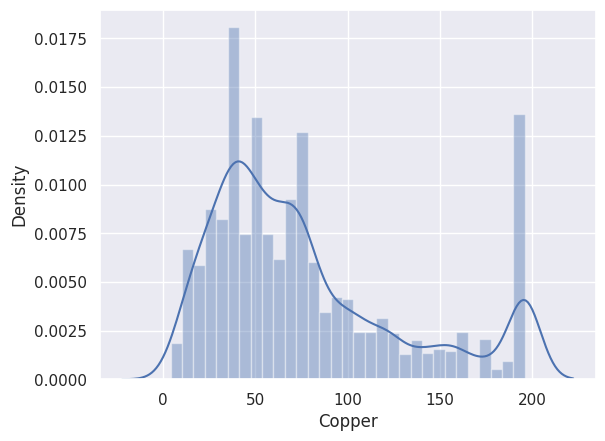

Alk_Phos
1.0759556558231427


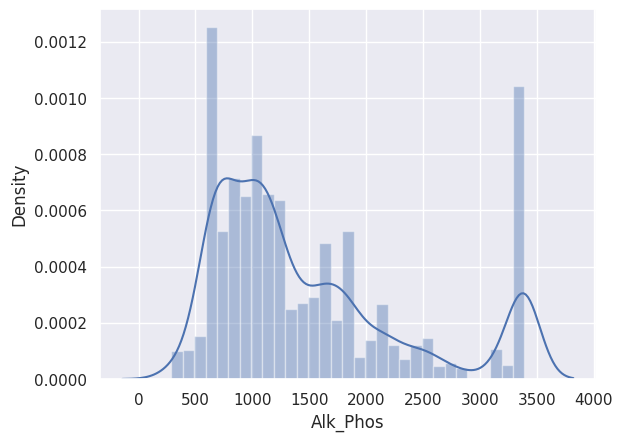

SGOT
0.6434335878721941


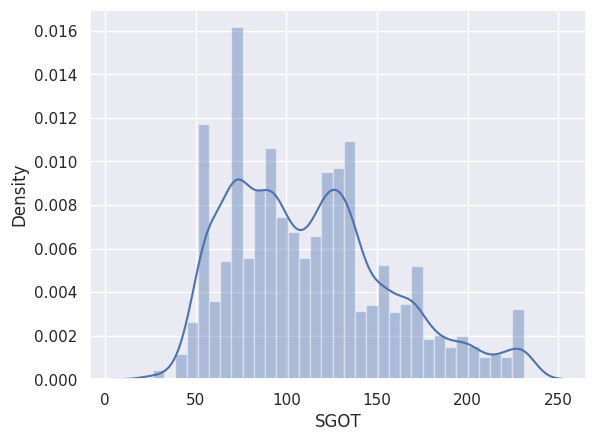

Tryglicerides
0.8097043075360254


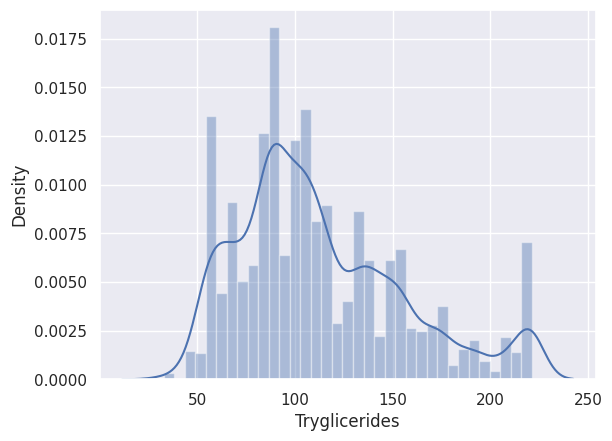

Platelets
0.37269580581905754


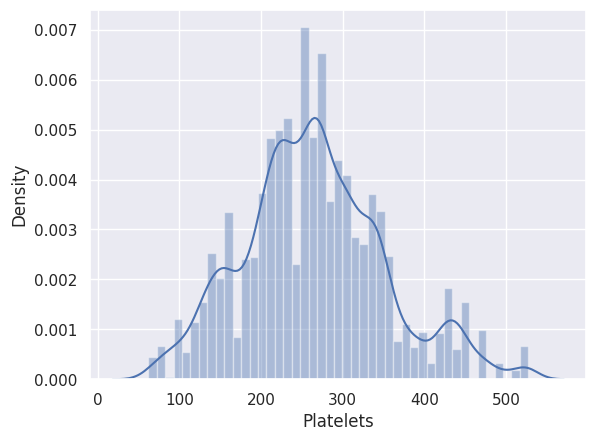

Prothrombin
1.292190771529963


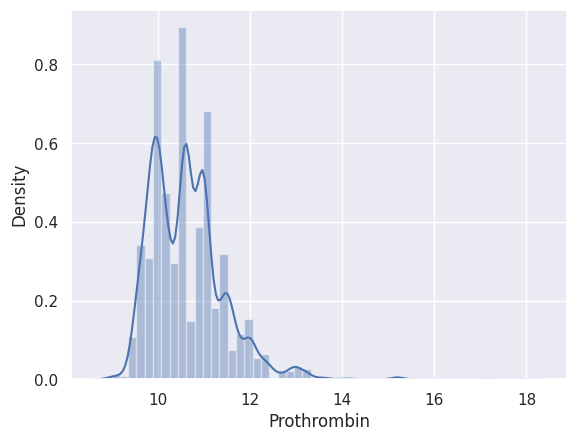

Stage
-0.5258732182675311


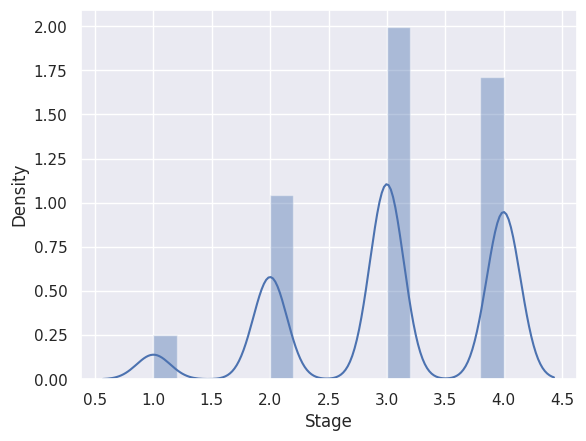

Status
0.6078725454540184


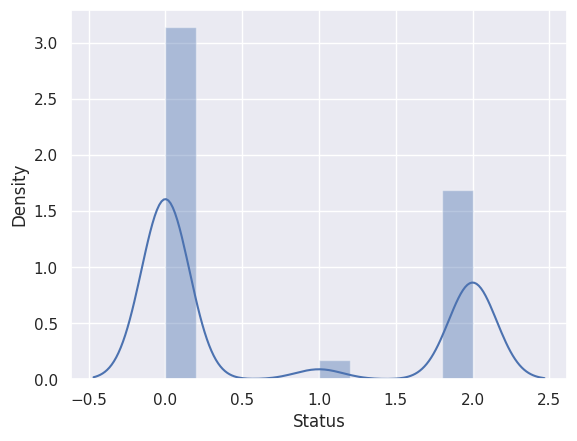

In [285]:
sns.set(font_scale=1)
from scipy.stats import skew
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [286]:
important_info = df.describe().T
important_info['variance'] = important_info['std']**2
important_info['co-variance'] = important_info['std']/important_info['mean']
important_info['skew'] = df.skew().T
important_info

count          mean          std      min       25%       50%  \
N_Days         7905.0   2030.173308  1094.233744    41.00   1230.00   1831.00   
Drug           7905.0      0.507274     0.499979     0.00      0.00      1.00   
Age            7905.0  18373.146490  3679.958739  9598.00  15574.00  18713.00   
Sex            7905.0      0.071980     0.258471     0.00      0.00      0.00   
Ascites        7905.0      0.048071     0.213929     0.00      0.00      0.00   
Hepatomegaly   7905.0      0.511322     0.499903     0.00      0.00      1.00   
Spiders        7905.0      0.245288     0.430285     0.00      0.00      0.00   
Edema          7905.0      0.137761     0.453977     0.00      0.00      0.00   
Bilirubin      7905.0      2.041708     1.942888     0.30      0.70      1.10   
Cholesterol    7905.0    329.552182   113.751729   120.00    248.00    298.00   
Albumin        7905.0      3.549818     0.340402     2.50      3.35      3.58   
Copper         7905.0     76.838963    52.554319     4.00     39.00     63.00   
Alk_Phos       7905.0   1488.036053   863.900564   289.00    834.00   1181.00   
SGOT           7905.0    113.483192    44.297013    26.35     75.95    108.50   
Tryglicerides  7905.0    112.980519    42.762370    33.00     84.00    104.00   
Platelets      7905.0    265.057432    86.915970    62.00    211.00    265.00   
Prothrombin    7905.0     10.629462     0.781735     9.00     10.00     10.60   
Stage          7905.0      3.032511     0.866511     1.00      2.00      3.00   
Status         7905.0      0.709045     0.938439     0.00      0.00      0.00   

                    75%      max      variance  co-variance      skew  
N_Days          2689.00   4795.0  1.197347e+06     0.538985  0.448660  
Drug               1.00      1.0  2.499787e-01     0.985619 -0.029104  
Age            20684.00  28650.0  1.354210e+07     0.200290  0.084091  
Sex                0.00      1.0  6.680713e-02     3.590881  3.312782  
Ascites            0.00      1.0  4.576582e-02     4.450296  4.226098  
Hepatomegaly       1.00      1.0  2.499034e-01     0.977669 -0.045308  
Spiders            0.00      1.0  1.851451e-01     1.754204  1.184223  
Edema              0.00      2.0  2.060954e-01     3.295400  3.334231  
Bilirubin          3.00      6.5  3.774813e+00     0.951599  1.364781  
Cholesterol      390.00    603.0  1.293946e+04     0.345171  1.002899  
Albumin            3.77      4.6  1.158738e-01     0.095893 -0.443712  
Copper           102.00    196.0  2.761956e+03     0.683954  1.034936  
Alk_Phos        1857.00   3391.0  7.463242e+05     0.580564  1.076160  
SGOT             137.95    231.0  1.962225e+03     0.390340  0.643556  
Tryglicerides    139.00    221.0  1.828620e+03     0.378493  0.809858  
Platelets        316.00    527.0  7.554386e+03     0.327914  0.372767  
Prothrombin       11.00     18.0  6.111093e-01     0.073544  1.292436  
Stage              4.00      4.0  7.508407e-01     0.285740 -0.525973  
Status             2.00      2.0  8.806684e-01     1.323526  0.607988

In [287]:
df.head()

N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  Bilirubin  \
0     999     0  21532    1        0             0        0      0        2.3   
1    2574     1  19237    0        0             0        0      0        0.9   
2    3428     1  13727    0        0             1        1      2        3.3   
3    2576     1  18460    0        0             0        0      0        0.6   
4     788     1  16658    0        0             1        0      0        1.1   

   Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  Platelets  \
0        316.0     3.35   172.0    1601.0  179.80           63.0      394.0   
1        364.0     3.54    63.0    1440.0  134.85           88.0      361.0   
2        299.0     3.55   131.0    1029.0  119.35           50.0      199.0   
3        256.0     3.50    58.0    1653.0   71.30           96.0      269.0   
4        346.0     3.65    63.0    1181.0  125.55           96.0      298.0   

   Prothrombin  Stage  Status  
0          9.7    3.0       2  
1         11.0    3.0       0  
2         11.7    4.0       2  
3         10.7    3.0       0  
4         10.6    4.0       0

In [288]:
df.shape

(7905, 19)

In [289]:
x=df.drop('Status',axis=1)
y=df.Status

In [290]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x1,y1 = sm.fit_resample(x,y)

<Axes: ylabel='count'>

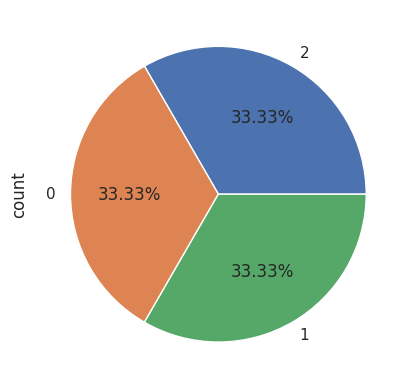

In [291]:
sns.set(font_scale=1)
y1.value_counts().plot.pie(autopct='%.2f%%')

In [292]:
y1.shape

(14895,)

<Axes: ylabel='count'>

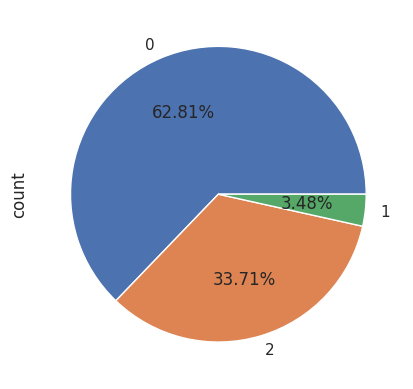

In [293]:
df.Status.value_counts().plot.pie(autopct='%.2f%%')

.

.

.

In [294]:
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , BaggingClassifier , RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [295]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x1,y1, random_state=42,test_size=0.30)

sc=StandardScaler()
sc.fit(x_train)

x_train_sca = sc.transform(x_train)
x_test_sca = sc.transform(x_test)

In [296]:
print(x_train_sca.shape)
print(x_test_sca.shape)
print(y_train.shape)
print(y_test.shape)

(10426, 18)
(4469, 18)
(10426,)
(4469,)


In [297]:
knn =KNeighborsClassifier()
knn.fit(x_train_sca,y_train)
knny_pred = knn.predict(x_test_sca)

print('Training  : ',knn.score(x_train_sca,y_train))
print('Testint : ',knn.score(x_test_sca,y_test))

print(classification_report(y_test,knny_pred))

recheck = cross_val_score(knn,x1,y1)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,knny_pred) - recheck.mean())

Training  :  0.8562248225589871
Testint :  0.7992839561423137
              precision    recall  f1-score   support

           0       0.84      0.72      0.78      1532
           1       0.75      0.97      0.85      1507
           2       0.82      0.70      0.75      1430

    accuracy                           0.80      4469
   macro avg       0.81      0.80      0.79      4469
weighted avg       0.81      0.80      0.80      4469

[0.77475663 0.78281302 0.77979188 0.81940248 0.82678751]
0.7967103054716348
difference 0.0025736506706789397


In [298]:
rfc= RandomForestClassifier(n_estimators=300)
rfc.fit(x_train_sca,y_train)
rfcy_pred = rfc.predict(x_test_sca)

print('Training  : ',rfc.score(x_train_sca,y_train))
print('Testint : ',rfc.score(x_test_sca,y_test))

print(classification_report(y_test,rfcy_pred))

recheck = cross_val_score(rfc,x1,y1,cv=12)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,rfcy_pred) - recheck.mean())
print(confusion_matrix(y_test,rfcy_pred))

Training  :  1.0
Testint :  0.8937122398746923
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1532
           1       0.94      0.97      0.95      1507
           2       0.86      0.84      0.85      1430

    accuracy                           0.89      4469
   macro avg       0.89      0.89      0.89      4469
weighted avg       0.89      0.89      0.89      4469

[0.83816425 0.88647343 0.9057971  0.89443997 0.89363417 0.88235294
 0.88718775 0.91780822 0.90330379 0.9081386  0.91216761 0.92183723]
0.8959420873769401
difference -0.0022298475022478614
[[1331   37  164]
 [  17 1459   31]
 [ 168   58 1204]]


In [299]:
"""rfc_param = {'max_depth':[5,10,15],
            'max_features':[5,7,8,'auto'],
            'criterion':['gini','entropy'],
            'min_samples_split':[4,8,16],
            'n_estimators':[200,300,400]}

clf = RandomizedSearchCV(rfc,rfc_param,cv=10)
clf.fit(x_train_sca,y_train)
print(clf.best_score_)
print(clf.best_params_)"""

"rfc_param = {'max_depth':[5,10,15],\n            'max_features':[5,7,8,'auto'],\n            'criterion':['gini','entropy'],\n            'min_samples_split':[4,8,16],\n            'n_estimators':[200,300,400]}\n\nclf = RandomizedSearchCV(rfc,rfc_param,cv=10)\nclf.fit(x_train_sca,y_train)\nprint(clf.best_score_)\nprint(clf.best_params_)"

In [300]:
abc =AdaBoostClassifier()
abc.fit(x_train_sca,y_train)
abcy_pred = abc.predict(x_test_sca)

print('Training  : ',abc.score(x_train_sca,y_train))
print('Testint : ',abc.score(x_test_sca,y_test))

print(classification_report(y_test,abcy_pred))

recheck = cross_val_score(abc,x1,y1)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,abcy_pred) - recheck.mean())

Training  :  0.7701899098407826
Testint :  0.7722085477735511
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1532
           1       0.78      0.80      0.79      1507
           2       0.71      0.70      0.70      1430

    accuracy                           0.77      4469
   macro avg       0.77      0.77      0.77      4469
weighted avg       0.77      0.77      0.77      4469

[0.7237328  0.77207116 0.77677073 0.76132931 0.76703592]
0.760187982544478
difference 0.012020565229073132


In [301]:
gbcbest = GradientBoostingClassifier()
gbcbest.fit(x_train_sca,y_train)
gbcy_pred = gbcbest.predict(x_test_sca)

print('Training  : ',gbcbest.score(x_train_sca,y_train))
print('Testint : ',gbcbest.score(x_test_sca,y_test))

print(accuracy_score(y_test,gbcy_pred))
print(classification_report(y_test,gbcy_pred))

recheck = cross_val_score(gbcbest,x1,y1,cv=5)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gbcy_pred) - recheck.mean())

Training  :  0.8521964319969307
Testint :  0.83419109420452
0.83419109420452
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1532
           1       0.85      0.89      0.87      1507
           2       0.81      0.75      0.78      1430

    accuracy                           0.83      4469
   macro avg       0.83      0.83      0.83      4469
weighted avg       0.83      0.83      0.83      4469

[0.79624035 0.83752937 0.83920779 0.82007385 0.83215844]
0.8250419603893924
difference 0.009149133815127608


In [302]:
bc = BaggingClassifier()
bc.fit(x_train_sca,y_train)
bcy_pred = bc.predict(x_test_sca)

print('Training  : ',bc.score(x_train_sca,y_train))
print('Testint : ',bc.score(x_test_sca,y_test))

print(classification_report(y_test,bcy_pred))

recheck = cross_val_score(bc,x1,y1)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,bcy_pred) - recheck.mean())

Training  :  0.99357375791291
Testint :  0.8563437010516894
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1532
           1       0.88      0.94      0.91      1507
           2       0.84      0.78      0.81      1430

    accuracy                           0.86      4469
   macro avg       0.86      0.86      0.85      4469
weighted avg       0.86      0.86      0.86      4469

[0.81940248 0.85767036 0.85263511 0.86136287 0.88116818]
0.8544478012755958
difference 0.0018958997760936125


In [303]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train_sca,y_train)
dtcy_pred = dtc.predict(x_test_sca)

print('Training  : ',dtc.score(x_train_sca,y_train))
print('Testint : ',dtc.score(x_test_sca,y_test))

print(classification_report(dtcy_pred,y_test))

recheck = cross_val_score(dtc,x1,y1)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,dtcy_pred) - recheck.mean())

Training  :  1.0
Testint :  0.7954799731483554
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1426
           1       0.90      0.83      0.86      1623
           2       0.74      0.75      0.75      1420

    accuracy                           0.80      4469
   macro avg       0.79      0.79      0.79      4469
weighted avg       0.80      0.80      0.80      4469

[0.76200067 0.79791876 0.7972474  0.80664653 0.81570997]
0.7959046659953004
difference -0.0004246928469450184


In [304]:
dtc_param = {'max_depth':[5,10,15],
            'max_features':[5,7,'auto'],
            'criterion':['gini','entropy'],
            'min_samples_split':[4,8,10]
            }
clf = GridSearchCV(dtc, dtc_param,cv=15)
clf.fit(x_train_sca,y_train)

print(clf.best_score_)
print(clf.best_params_)

0.7832306568538274
{'criterion': 'entropy', 'max_depth': 15, 'max_features': 5, 'min_samples_split': 4}


In [305]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train_sca, y_train)

print('Training  : ',xgb.score(x_train_sca,y_train))
print('Testint : ',xgb.score(x_test_sca,y_test))

Training  :  0.9973144062919624
Testint :  0.8972924591631237


In [306]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(verbose = False)
cat.fit(x_train_sca, y_train)
caty_pred = cat.predict(x_test_sca)

print('Training  : ',cat.score(x_train_sca,y_train))
print('Testint : ',cat.score(x_test_sca,y_test))

print(classification_report(y_test,caty_pred))

recheck = cross_val_score(cat,x1,y1)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,caty_pred) - recheck.mean())

Training  :  0.9745827738346442
Testint :  0.895278585813381
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1532
           1       0.93      0.97      0.95      1507
           2       0.88      0.82      0.85      1430

    accuracy                           0.90      4469
   macro avg       0.89      0.89      0.89      4469
weighted avg       0.89      0.90      0.89      4469

[0.84222894 0.88183954 0.89392414 0.904666   0.90802283]
0.8861362873447465
difference 0.009142298468634569


# CatBoostClassifier is best performing

.

.

In [ ]:
test_data = pd.read_csv("/kaggle/input/playground-series-s3e26/test.csv")

In [308]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5271 non-null   int64  
 1   N_Days         5271 non-null   int64  
 2   Drug           5271 non-null   object 
 3   Age            5271 non-null   int64  
 4   Sex            5271 non-null   object 
 5   Ascites        5271 non-null   object 
 6   Hepatomegaly   5271 non-null   object 
 7   Spiders        5271 non-null   object 
 8   Edema          5271 non-null   object 
 9   Bilirubin      5271 non-null   float64
 10  Cholesterol    5271 non-null   float64
 11  Albumin        5271 non-null   float64
 12  Copper         5271 non-null   float64
 13  Alk_Phos       5271 non-null   float64
 14  SGOT           5271 non-null   float64
 15  Tryglicerides  5271 non-null   float64
 16  Platelets      5271 non-null   float64
 17  Prothrombin    5271 non-null   float64
 18  Stage   

In [309]:
test_data.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [310]:
test_data.duplicated().sum()

0

In [311]:
test_data.nunique()

id               5271
N_Days            409
Drug                2
Age               363
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         108
Cholesterol       222
Albumin           154
Copper            164
Alk_Phos          362
SGOT              195
Tryglicerides     155
Platelets         223
Prothrombin        47
Stage               4
dtype: int64

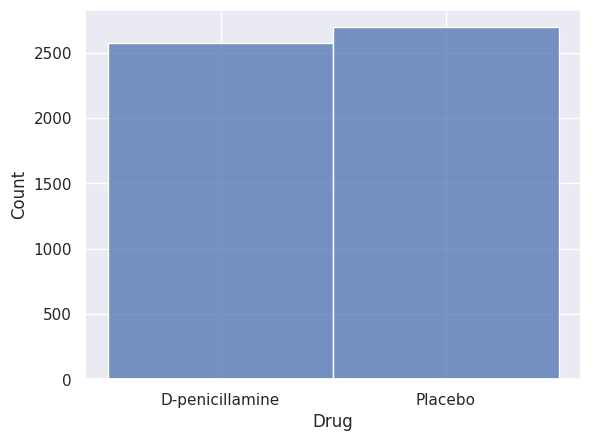

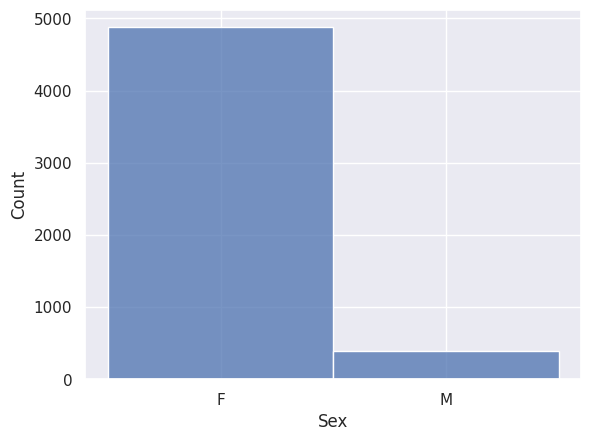

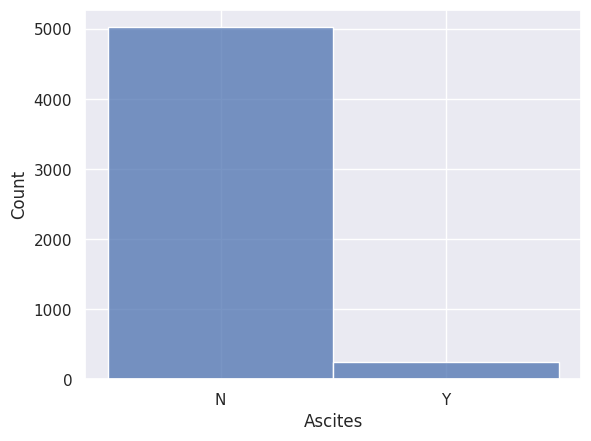

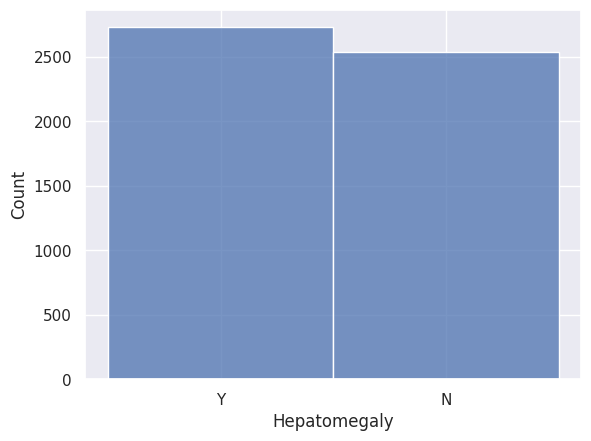

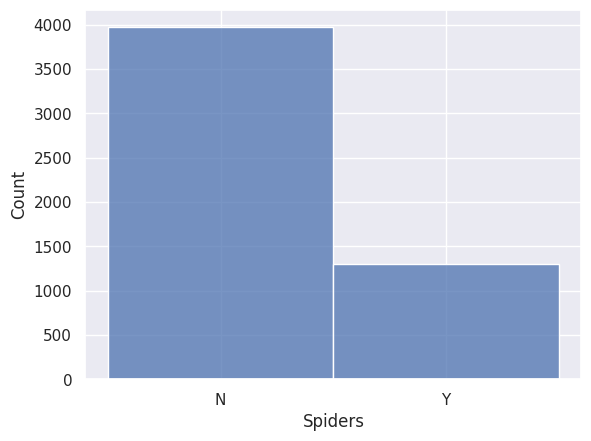

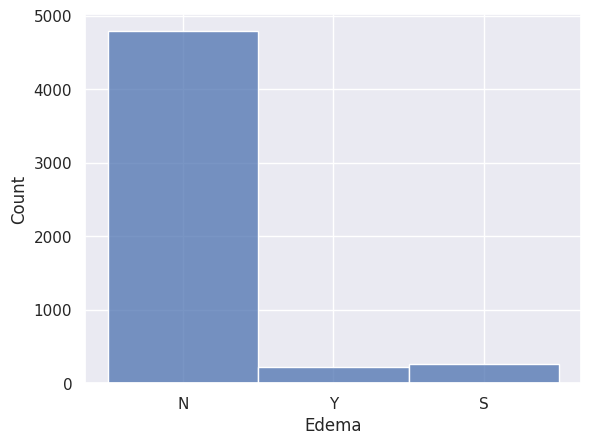

In [312]:
for i in test_data.select_dtypes(include = 'object').columns:
    sns.histplot(data=test_data,x=i)
    plt.show()

In [313]:
categorical_features2 = test_data.select_dtypes(include = 'object').columns
print("Categorical features: ", categorical_features2)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in categorical_features2:
    test_data[i] = encoder.fit_transform(test_data[i])

Categorical features:  Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')


<Axes: >

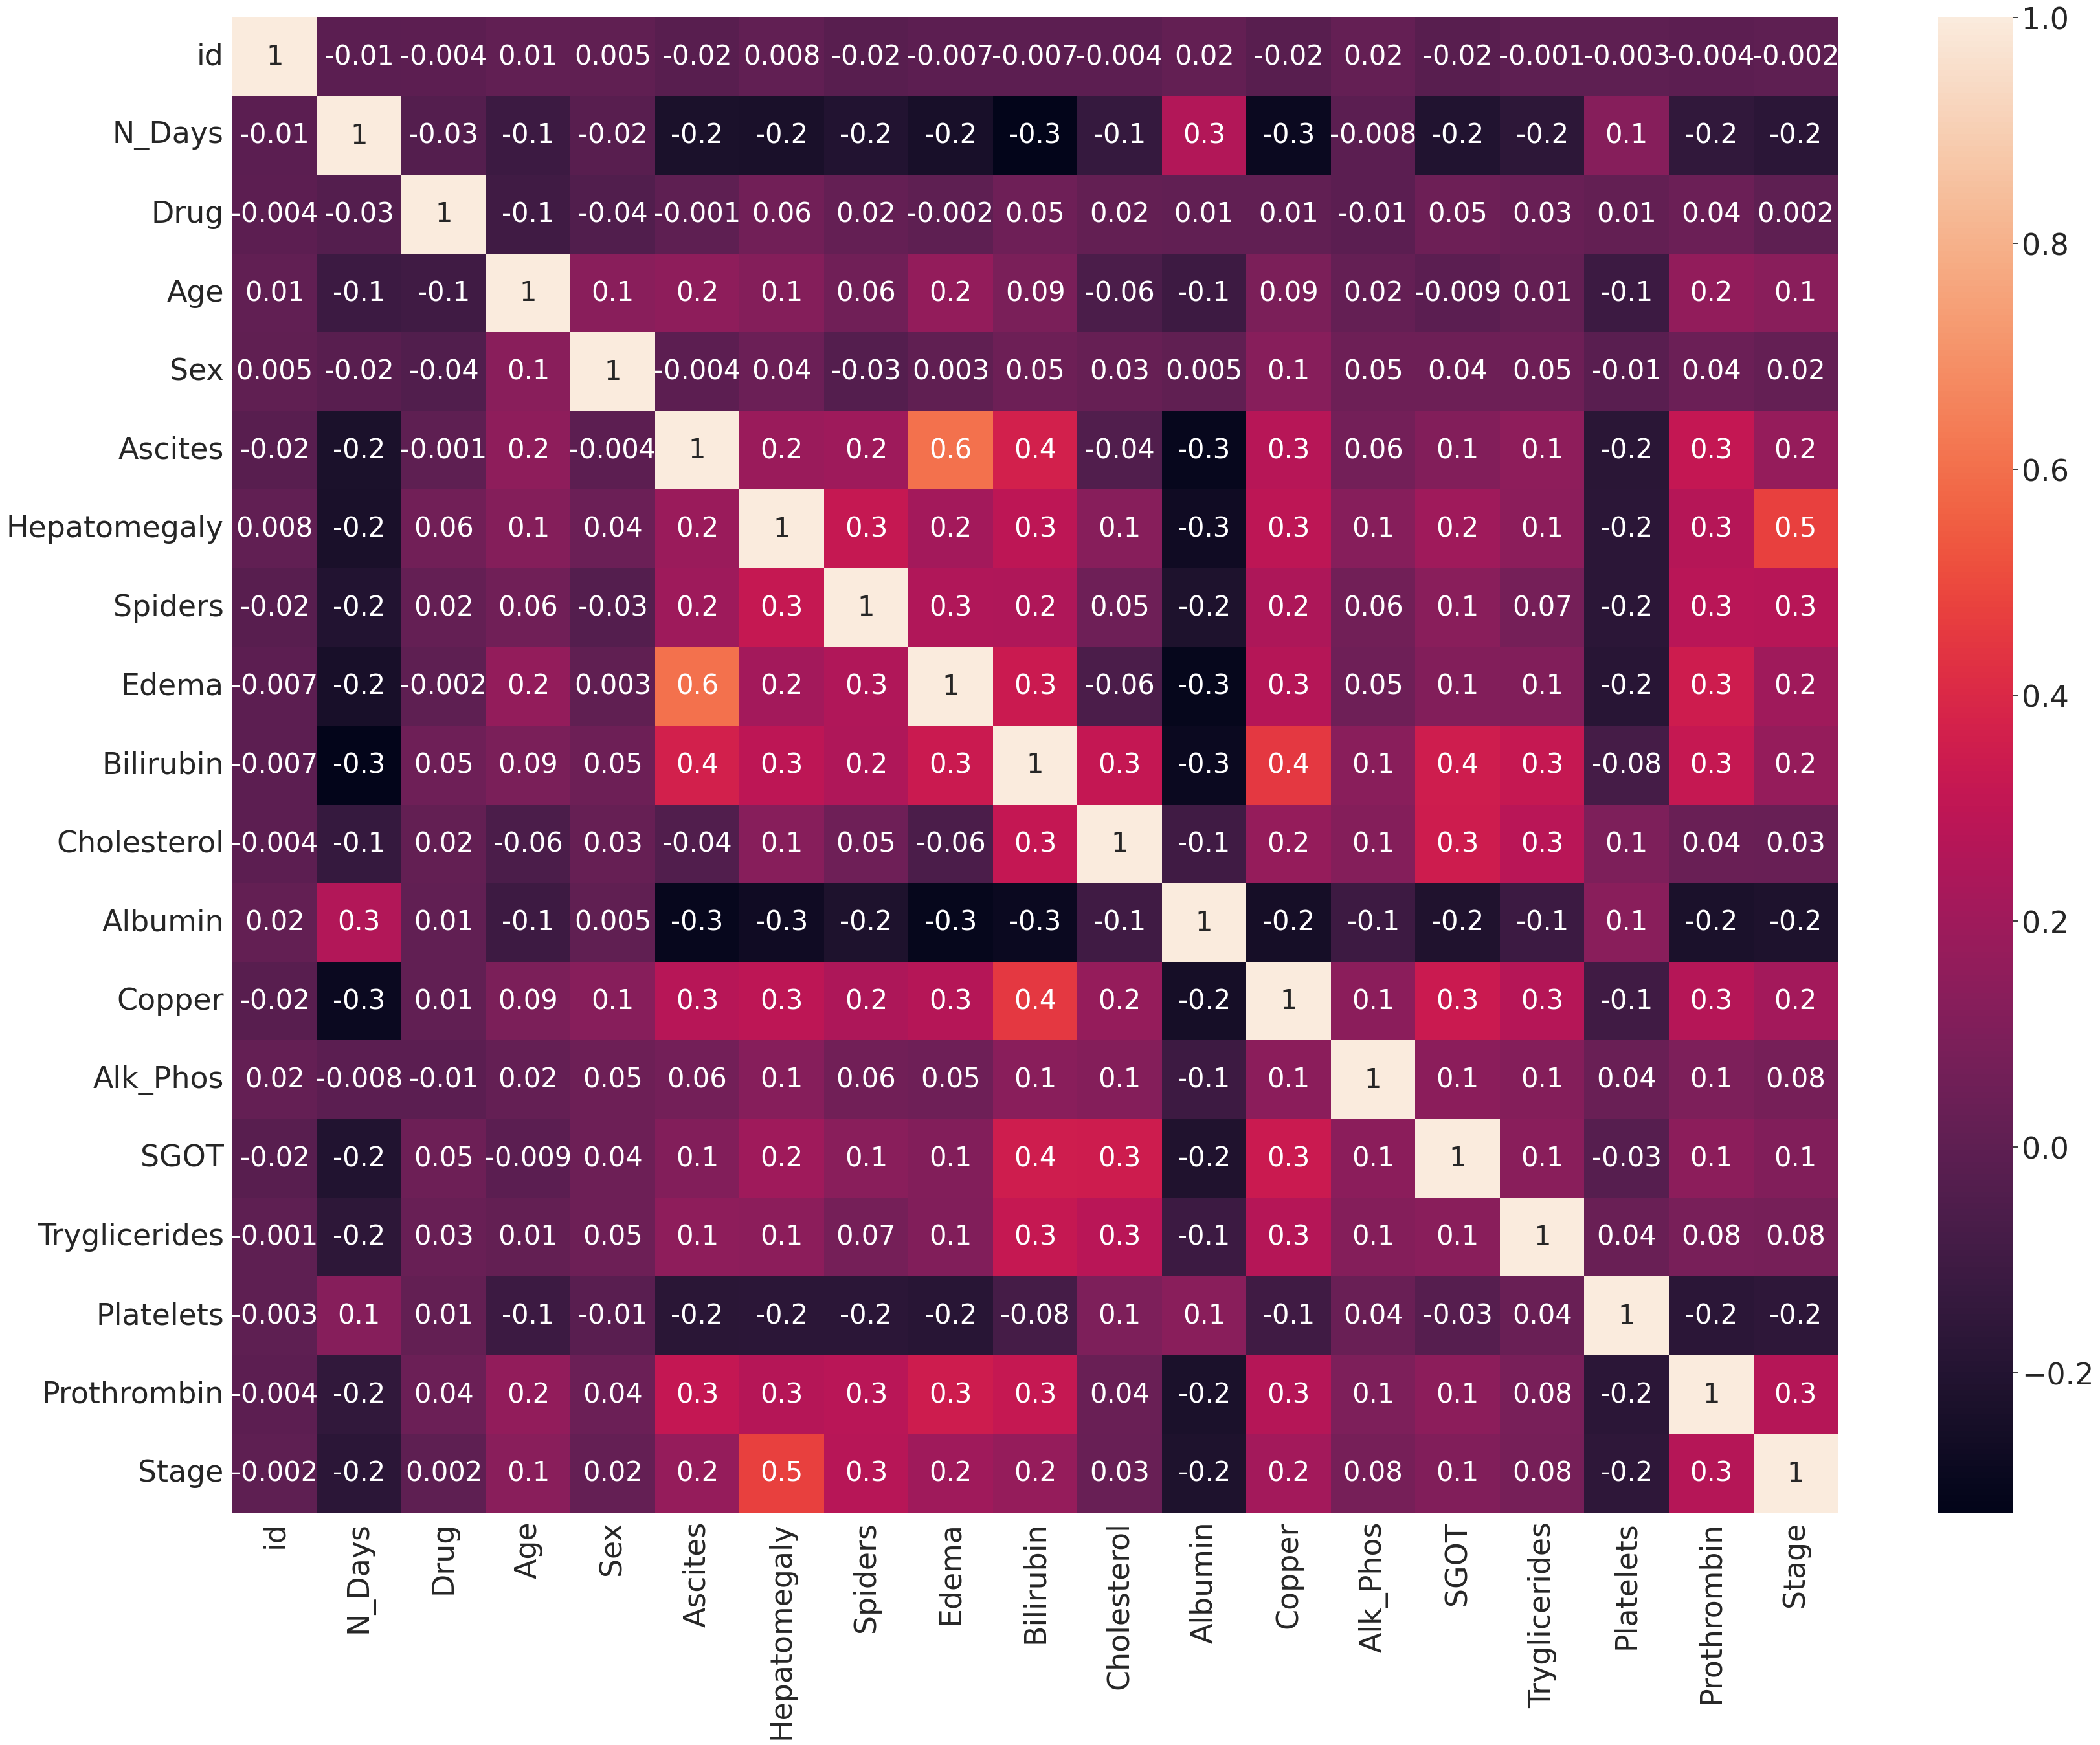

In [314]:
sns.set(font_scale=3)
plt.figure(figsize=(40,30))
sns.heatmap(test_data.corr(),fmt='.1g',annot=True,annot_kws={'fontsize':30})

In [315]:
#test_data = test_data.drop('id',axis=1)

In [316]:
final = cat
final.fit(x1,y1)

In [317]:
predicting_test = final.predict(test_data)
predicting_test

array([[2],
       [1],
       [2],
       ...,
       [0],
       [0],
       [2]])

In [318]:
test = pd.DataFrame(predicting_test)
test

0
0     2
1     1
2     2
3     0
4     0
...  ..
5266  0
5267  0
5268  0
5269  0
5270  2

[5271 rows x 1 columns]

# 0 = C
# 1 = CL
# 2 = D

In [319]:
predicting_test

array([[2],
       [1],
       [2],
       ...,
       [0],
       [0],
       [2]])

In [320]:
sample = pd.read_csv('/kaggle/input/playground-series-s3e26/sample_submission.csv')
sample

id  Status_C  Status_CL  Status_D
0      7905  0.628084   0.034788  0.337128
1      7906  0.628084   0.034788  0.337128
2      7907  0.628084   0.034788  0.337128
3      7908  0.628084   0.034788  0.337128
4      7909  0.628084   0.034788  0.337128
...     ...       ...        ...       ...
5266  13171  0.628084   0.034788  0.337128
5267  13172  0.628084   0.034788  0.337128
5268  13173  0.628084   0.034788  0.337128
5269  13174  0.628084   0.034788  0.337128
5270  13175  0.628084   0.034788  0.337128

[5271 rows x 4 columns]

In [321]:
ids = test_data['id']

In [323]:
filename = 'Cirrhosis_Outcomes2.csv'
predicting_test.to_csv(filename, index = False)
print('Saved file: ' + filename)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'